In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas_profiling 
from numpy import argmax
import itertools
%matplotlib inline
sns.set(color_codes=True)

# setting up plot style 
#style.use('seaborn-poster')
#style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import statsmodels.formula.api as SM
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import fbeta_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## 1. Import and warehouse data:

### Import all the given datasets. Explore shape and size.

In [302]:
df_tel1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df_tel2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [303]:
df_tel1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No

In [304]:
df_tel1.shape

(7043, 10)

In [305]:
df_tel2.head()

OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes

In [306]:
df_tel2.shape

(7043, 11)

### Merge all datasets onto one and explore final shape and size.

In [307]:
df = pd.concat([df_tel1, df_tel2], axis = 1)
df

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0     7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1     5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2     3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3     7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4     9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes
...          ...     ...            ...     ...        ...     ...          ...               ...             ...            ...          ...              ...         ...         ...             ...             ...              ...                        ...             ...          ...   ...
7038  6840-RESVB    Male              0     Yes        Yes      24          Yes               Yes             DSL            Yes           No              Yes         Yes         Yes             Yes        One year              Yes               Mailed check           84.80       1990.5    No
7039  2234-XADUH  Female              0     Yes        Yes      72          Yes               Yes     Fiber optic             No          Yes              Yes          No         Yes             Yes        One year              Yes    Credit card (automatic)          103.20       7362.9    No
7040  4801-JZAZL  Female              0     Yes        Yes      11           No  No phone service             DSL            Yes           No               No          No          No              No  Month-to-month              Yes           Electronic check           29.60       346.45    No
7041  8361-LTMKD    Male              1     Yes         No       4          Yes               Yes     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes               Mailed check           74.40        306.6   Yes
7042  3186-AJIEK    Male              0      No         No      66          Yes                No     Fiber optic            Yes           No              Yes         Yes         Yes             Yes        Two year              Yes  Bank transfer (automatic)          105.65       6844.5    No

[7043 rows x 21 columns]

In [308]:
df.shape

(7043, 21)

In [309]:
df.to_csv('TeleCustomer_Merged.csv',index=False)

### Saving Merged Dataset for Automating later.

## 2. Data Cleansing:

### Missing value treatment

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [311]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [312]:
df.isnull().sum() #to check if any column is having null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [313]:
df.loc[df.tenure == 0, 'tenure'] #checking if any value is 0 in tenure column as a customer cannot have 0 as tenure

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

In [314]:
df.loc[df.tenure == 0, 'tenure'] = df.tenure.median()
df.tenure.median()

29.0

In [315]:
print(df.loc[488, 'tenure']) #all the rows with 0 value is substituted by the median.
print(df.loc[753, 'tenure'])
print(df.loc[936, 'tenure'])
print(df.loc[1082, 'tenure'])
print(df.loc[1340, 'tenure'])
print(df.loc[3331, 'tenure'])
print(df.loc[3826, 'tenure'])
print(df.loc[4380, 'tenure'])
print(df.loc[5218, 'tenure'])
print(df.loc[6670, 'tenure'])
print(df.loc[6754, 'tenure'])

29
29
29
29
29
29
29
29
29
29
29


### Convert categorical attributes to continuous using relevant functional knowledge

In [316]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes
5  9305-CDSKC  Female              0      No         No       8          Yes               Yes     Fiber optic             No           No              Yes          No         Yes             Yes  Month-to-month              Yes           Electronic check           99.65        820.5   Yes
6  1452-KIOVK    Male              0      No        Yes      22          Yes               Yes     Fiber optic             No          Yes               No          No         Yes              No  Month-to-month              Yes    Credit card (automatic)           89.10       1949.4    No
7  6713-OKOMC  Female              0      No         No      10           No  No phone service             DSL            Yes           No               No          No          No              No  Month-to-month               No               Mailed check           29.75        301.9    No
8  7892-POOKP  Female              0     Yes         No      28          Yes               Yes     Fiber optic             No           No              Yes         Yes         Yes             Yes  Month-to-month              Yes           Electronic check          104.80      3046.05   Yes
9  6388-TABGU    Male              0      No        Yes      62          Yes                No             DSL            Yes          Yes               No          No          No              No        One year               No  Bank transfer (automatic)           56.15      3487.95    No

In [317]:
print(df['gender'].value_counts()) #not ordered
print(df['SeniorCitizen'].value_counts()) #not ordered
print(df['Partner'].value_counts()) #not ordered
print(df['Dependents'].value_counts()) #not ordered
print(df['PhoneService'].value_counts()) #not ordered
print(df['MultipleLines'].value_counts()) #not ordered
print(df['InternetService'].value_counts()) #not ordered
print(df['OnlineSecurity'].value_counts()) #not ordered
print(df['OnlineBackup'].value_counts()) #not ordered
print(df['DeviceProtection'].value_counts()) #not ordered
print(df['TechSupport'].value_counts()) #not ordered
print(df['StreamingTV'].value_counts()) #not ordered
print(df['StreamingMovies'].value_counts()) #not ordered
print(df['Contract'].value_counts()) #ordered
print(df['PaperlessBilling'].value_counts()) #not ordered
print(df['PaymentMethod'].value_counts()) # ordered
print(df['Churn'].value_counts()) #not ordered

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [318]:
replaceStruct = {
                "gender":     {"Male": 1, "Female": 2},
                "Partner": {"Yes": 1, "No":0},
                "Dependents": {"Yes": 1, "No":0},
                "PhoneService": {"Yes": 1, "No": 0},
                "MultipleLines": {"Yes": 1, "No": 0, "No phone service":-1},
                "OnlineSecurity": {"Yes": 1, "No": 0, "No internet service":-1},
                "OnlineBackup": {"Yes": 1, "No": 0, "No internet service":-1},
                "DeviceProtection": {"Yes": 1, "No": 0, "No internet service":-1},
                "TechSupport": {"Yes": 1, "No": 0, "No internet service":-1},
                "StreamingTV": {"Yes": 1, "No": 0, "No internet service":-1},
                "StreamingMovies": {"Yes": 1, "No": 0, "No internet service":-1},
                "PaperlessBilling": {"Yes": 1, "No": 0},
                "Churn": {"Yes": 1, "No": 0}
                }
#oneHotCols=["InternetService","Contract","PaymentMethod"]

In [319]:
df=df.replace(replaceStruct)
#df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  Churn
0  7590-VHVEG       2              0        1           0       1             0             -1             DSL               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85        29.85      0
1  5575-GNVDE       1              0        0           0      34             1              0             DSL               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.5      0
2  3668-QPYBK       1              0        0           0       2             1              0             DSL               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85       108.15      1
3  7795-CFOCW       1              0        0           0      45             0             -1             DSL               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30      1840.75      0
4  9237-HQITU       2              0        0           0       2             1              0     Fiber optic               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70       151.65      1
5  9305-CDSKC       2              0        0           0       8             1              1     Fiber optic               0             0                 1            0            1                1  Month-to-month                 1           Electronic check           99.65        820.5      1
6  1452-KIOVK       1              0        0           1      22             1              1     Fiber optic               0             1                 0            0            1                0  Month-to-month                 1    Credit card (automatic)           89.10       1949.4      0
7  6713-OKOMC       2              0        0           0      10             0             -1             DSL               1             0                 0            0            0                0  Month-to-month                 0               Mailed check           29.75        301.9      0
8  7892-POOKP       2              0        1           0      28             1              1     Fiber optic               0             0                 1            1            1                1  Month-to-month                 1           Electronic check          104.80      3046.05      1
9  6388-TABGU       1              0        0           1      62             1              0             DSL               1             1                 0            0            0                0        One year                 0  Bank transfer (automatic)           56.15      3487.95      0

In [320]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['InternetService'] = le.fit_transform(df['InternetService'])
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  Churn
0     7590-VHVEG       2              0        1           0       1             0             -1                0               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85        29.85      0
1     5575-GNVDE       1              0        0           0      34             1              0                0               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.5      0
2     3668-QPYBK       1              0        0           0       2             1              0                0               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85       108.15      1
3     7795-CFOCW       1              0        0           0      45             0             -1                0               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30      1840.75      0
4     9237-HQITU       2              0        0           0       2             1              0                1               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70       151.65      1
...          ...     ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...             ...               ...                        ...             ...          ...    ...
7038  6840-RESVB       1              0        1           1      24             1              1                0               1             0                 1            1            1                1        One year                 1               Mailed check           84.80       1990.5      0
7039  2234-XADUH       2              0        1           1      72             1              1                1               0             1                 1            0            1                1        One year                 1    Credit card (automatic)          103.20       7362.9      0
7040  4801-JZAZL       2              0        1           1      11             0             -1                0               1             0                 0            0            0                0  Month-to-month                 1           Electronic check           29.60       346.45      0
7041  8361-LTMKD       1              1        1           0       4             1              1                1               0             0                 0            0            0                0  Month-to-month                 1               Mailed check           74.40        306.6      1
7042  3186-AJIEK       1              0        0           0      66             1              0                1               1             0                 1            1            1                1        Two year                 1  Bank transfer (automatic)          105.65       6844.5      0

[7043 rows x 21 columns]

In [321]:
df['InternetService'].value_counts() #now ordered

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64

In [322]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  Churn
0     7590-VHVEG       2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1           Electronic check           29.85        29.85      0
1     5575-GNVDE       1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0               Mailed check           56.95       1889.5      0
2     3668-QPYBK       1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1               Mailed check           53.85       108.15      1
3     7795-CFOCW       1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0  Bank transfer (automatic)           42.30      1840.75      0
4     9237-HQITU       2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1           Electronic check           70.70       151.65      1
...          ...     ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...                        ...             ...          ...    ...
7038  6840-RESVB       1              0        1           1      24             1              1                0               1             0                 1            1            1                1         1                 1               Mailed check           84.80       1990.5      0
7039  2234-XADUH       2              0        1           1      72             1              1                1               0             1                 1            0            1                1         1                 1    Credit card (automatic)          103.20       7362.9      0
7040  4801-JZAZL       2              0        1           1      11             0             -1                0               1             0                 0            0            0                0         0                 1           Electronic check           29.60       346.45      0
7041  8361-LTMKD       1              1        1           0       4             1              1                1               0             0                 0            0            0                0         0                 1               Mailed check           74.40        306.6      1
7042  3186-AJIEK       1              0        0           0      66             1              0                1               1             0                 1            1            1                1         2                 1  Bank transfer (automatic)          105.65       6844.5      0

[7043 rows x 21 columns]

In [323]:
df['Contract'].value_counts() #now ordered

0    3875
2    1695
1    1473
Name: Contract, dtype: int64

In [324]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  Churn
0     7590-VHVEG       2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1              2           29.85        29.85      0
1     5575-GNVDE       1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3           56.95       1889.5      0
2     3668-QPYBK       1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1              3           53.85       108.15      1
3     7795-CFOCW       1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0              0           42.30      1840.75      0
4     9237-HQITU       2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2           70.70       151.65      1
...          ...     ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...            ...             ...          ...    ...
7038  6840-RESVB       1              0        1           1      24             1              1                0               1             0                 1            1            1                1         1                 1              3           84.80       1990.5      0
7039  2234-XADUH       2              0        1           1      72             1              1                1               0             1                 1            0            1                1         1                 1              1          103.20       7362.9      0
7040  4801-JZAZL       2              0        1           1      11             0             -1                0               1             0                 0            0            0                0         0                 1              2           29.60       346.45      0
7041  8361-LTMKD       1              1        1           0       4             1              1                1               0             0                 0            0            0                0         0                 1              3           74.40        306.6      1
7042  3186-AJIEK       1              0        0           0      66             1              0                1               1             0                 1            1            1                1         2                 1              0          105.65       6844.5      0

[7043 rows x 21 columns]

In [325]:
df['PaymentMethod'].value_counts() #now ordered

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

In [326]:
df.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  Churn
0  7590-VHVEG       2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1              2           29.85        29.85      0
1  5575-GNVDE       1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3           56.95       1889.5      0
2  3668-QPYBK       1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1              3           53.85       108.15      1
3  7795-CFOCW       1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0              0           42.30      1840.75      0
4  9237-HQITU       2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2           70.70       151.65      1
5  9305-CDSKC       2              0        0           0       8             1              1                1               0             0                 1            0            1                1         0                 1              2           99.65        820.5      1
6  1452-KIOVK       1              0        0           1      22             1              1                1               0             1                 0            0            1                0         0                 1              1           89.10       1949.4      0
7  6713-OKOMC       2              0        0           0      10             0             -1                0               1             0                 0            0            0                0         0                 0              3           29.75        301.9      0
8  7892-POOKP       2              0        1           0      28             1              1                1               0             0                 1            1            1                1         0                 1              2          104.80      3046.05      1
9  6388-TABGU       1              0        0           1      62             1              0                0               1             1                 0            0            0                0         1                 0              0           56.15      3487.95      0

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   int64   
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   int64   
 4   Dependents        7043 non-null   int64   
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   int64   
 7   MultipleLines     7043 non-null   int64   
 8   InternetService   7043 non-null   int32   
 9   OnlineSecurity    7043 non-null   int64   
 10  OnlineBackup      7043 non-null   int64   
 11  DeviceProtection  7043 non-null   int64   
 12  TechSupport       7043 non-null   int64   
 13  StreamingTV       7043 non-null   int64   
 14  StreamingMovies   7043 non-null   int64   
 15  Contract          7043 non-null   int32   
 16  PaperlessBilling  7043 n

In [328]:
TotalCharges_Digit = pd.DataFrame(df.TotalCharges.str.isdigit())

TotalCharges_Digit[TotalCharges_Digit['TotalCharges'] == False] 

TotalCharges
0            False
1            False
2            False
3            False
4            False
...            ...
7038         False
7039         False
7040         False
7041         False
7042         False

[6719 rows x 1 columns]

In [329]:
print(df.loc[3, 'TotalCharges'])

1840.75


In [330]:
TotalCharges_Digit[TotalCharges_Digit['TotalCharges'] == True]

TotalCharges
46            True
62            True
72            True
87            True
93            True
...            ...
6936          True
6942          True
6959          True
7019          True
7020          True

[324 rows x 1 columns]

In [331]:
print(df.loc[46, 'TotalCharges'])

97


In [332]:
TotalCharges_Space = pd.DataFrame(df.TotalCharges.str.isspace())

TotalCharges_Space[TotalCharges_Space['TotalCharges'] == False] 

TotalCharges
0            False
1            False
2            False
3            False
4            False
...            ...
7038         False
7039         False
7040         False
7041         False
7042         False

[7032 rows x 1 columns]

In [333]:
TotalCharges_Space[TotalCharges_Space['TotalCharges'] == True] 

TotalCharges
488           True
753           True
936           True
1082          True
1340          True
3331          True
3826          True
4380          True
5218          True
6670          True
6754          True

In [334]:
df["TotalCharges"]= df["TotalCharges"].str.strip()

In [335]:
TotalCharges_Space = pd.DataFrame(df.TotalCharges.str.isspace())

TotalCharges_Space[TotalCharges_Space['TotalCharges'] == True] 

Empty DataFrame
Columns: [TotalCharges]
Index: []

In [336]:
df[df['TotalCharges']=='']

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  Churn
488   4472-LVYGI       2              0        1           1      29             0             -1                0               1             0                 1            1            1                0         2                 1              0           52.55                   0
753   3115-CZMZD       1              0        0           1      29             1              0                2              -1            -1                -1           -1           -1               -1         2                 0              3           20.25                   0
936   5709-LVOEQ       2              0        1           1      29             1              0                0               1             1                 1            0            1                1         2                 0              3           80.85                   0
1082  4367-NUYAO       1              0        1           1      29             1              1                2              -1            -1                -1           -1           -1               -1         2                 0              3           25.75                   0
1340  1371-DWPAZ       2              0        1           1      29             0             -1                0               1             1                 1            1            1                0         2                 0              1           56.05                   0
3331  7644-OMVMY       1              0        1           1      29             1              0                2              -1            -1                -1           -1           -1               -1         2                 0              3           19.85                   0
3826  3213-VVOLG       1              0        1           1      29             1              1                2              -1            -1                -1           -1           -1               -1         2                 0              3           25.35                   0
4380  2520-SGTTA       2              0        1           1      29             1              0                2              -1            -1                -1           -1           -1               -1         2                 0              3           20.00                   0
5218  2923-ARZLG       1              0        1           1      29             1              0                2              -1            -1                -1           -1           -1               -1         1                 1              3           19.70                   0
6670  4075-WKNIU       2              0        1           1      29             1              1                0               0             1                 1            1            1                0         2                 0              3           73.35                   0
6754  2775-SEFEE       1              0        0           1      29             1              1                0               1             1                 0            1            0                0         2                 1              0           61.90                   0

In [337]:
df.loc[df.TotalCharges == '', 'TotalCharges'] #checking if any value is null in TotalCharges column

488     
753     
936     
1082    
1340    
3331    
3826    
4380    
5218    
6670    
6754    
Name: TotalCharges, dtype: object

In [338]:
df.loc[df.TotalCharges == '', 'TotalCharges'] = 0
df.loc[df.TotalCharges == 0]

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  Churn
488   4472-LVYGI       2              0        1           1      29             0             -1                0               1             0                 1            1            1                0         2                 1              0           52.55            0      0
753   3115-CZMZD       1              0        0           1      29             1              0                2              -1            -1                -1           -1           -1               -1         2                 0              3           20.25            0      0
936   5709-LVOEQ       2              0        1           1      29             1              0                0               1             1                 1            0            1                1         2                 0              3           80.85            0      0
1082  4367-NUYAO       1              0        1           1      29             1              1                2              -1            -1                -1           -1           -1               -1         2                 0              3           25.75            0      0
1340  1371-DWPAZ       2              0        1           1      29             0             -1                0               1             1                 1            1            1                0         2                 0              1           56.05            0      0
3331  7644-OMVMY       1              0        1           1      29             1              0                2              -1            -1                -1           -1           -1               -1         2                 0              3           19.85            0      0
3826  3213-VVOLG       1              0        1           1      29             1              1                2              -1            -1                -1           -1           -1               -1         2                 0              3           25.35            0      0
4380  2520-SGTTA       2              0        1           1      29             1              0                2              -1            -1                -1           -1           -1               -1         2                 0              3           20.00            0      0
5218  2923-ARZLG       1              0        1           1      29             1              0                2              -1            -1                -1           -1           -1               -1         1                 1              3           19.70            0      0
6670  4075-WKNIU       2              0        1           1      29             1              1                0               0             1                 1            1            1                0         2                 0              3           73.35            0      0
6754  2775-SEFEE       1              0        0           1      29             1              1                0               1             1                 0            1            0                0         2                 1              0           61.90            0      0

In [339]:
df.loc[df.TotalCharges == '', 'TotalCharges']

Series([], Name: TotalCharges, dtype: object)

In [340]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   int64   
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   int64   
 4   Dependents        7043 non-null   int64   
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   int64   
 7   MultipleLines     7043 non-null   int64   
 8   InternetService   7043 non-null   int32   
 9   OnlineSecurity    7043 non-null   int64   
 10  OnlineBackup      7043 non-null   int64   
 11  DeviceProtection  7043 non-null   int64   
 12  TechSupport       7043 non-null   int64   
 13  StreamingTV       7043 non-null   int64   
 14  StreamingMovies   7043 non-null   int64   
 15  Contract          7043 non-null   int32   
 16  PaperlessBilling  7043 n

In [342]:
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
0     7590-VHVEG       2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1              2           29.85         29.85      0
1     5575-GNVDE       1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3           56.95       1889.50      0
2     3668-QPYBK       1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1              3           53.85        108.15      1
3     7795-CFOCW       1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0              0           42.30       1840.75      0
4     9237-HQITU       2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2           70.70        151.65      1
...          ...     ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...            ...             ...           ...    ...
7038  6840-RESVB       1              0        1           1      24             1              1                0               1             0                 1            1            1                1         1                 1              3           84.80       1990.50      0
7039  2234-XADUH       2              0        1           1      72             1              1                1               0             1                 1            0            1                1         1                 1              1          103.20       7362.90      0
7040  4801-JZAZL       2              0        1           1      11             0             -1                0               1             0                 0            0            0                0         0                 1              2           29.60        346.45      0
7041  8361-LTMKD       1              1        1           0       4             1              1                1               0             0                 0            0            0                0         0                 1              3           74.40        306.60      1
7042  3186-AJIEK       1              0        0           0      66             1              0                1               1             0                 1            1            1                1         2                 1              0          105.65       6844.50      0

[7043 rows x 21 columns]

In [343]:
df.loc[df.TotalCharges == 0, 'TotalCharges']

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
Name: TotalCharges, dtype: float64

In [344]:
df.TotalCharges.mean()

2279.734303563826

In [345]:
df.loc[df.TotalCharges == 0, 'TotalCharges'] = df.TotalCharges.mean()

In [346]:
df.loc[df.TotalCharges == 0, 'TotalCharges']

Series([], Name: TotalCharges, dtype: float64)

In [347]:
df.loc[df.TotalCharges == 2279.734303563826, 'TotalCharges']

488     2279.734304
753     2279.734304
936     2279.734304
1082    2279.734304
1340    2279.734304
3331    2279.734304
3826    2279.734304
4380    2279.734304
5218    2279.734304
6670    2279.734304
6754    2279.734304
Name: TotalCharges, dtype: float64

### Drop attribute/s if required using relevant functional knowledge

In [348]:
df=df.drop('customerID',axis=1) #Customer ID is a unique value and thus is not required for this case study analysis.
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
0          2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1              2           29.85         29.85      0
1          1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3           56.95       1889.50      0
2          1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1              3           53.85        108.15      1
3          1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0              0           42.30       1840.75      0
4          2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2           70.70        151.65      1
...      ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...            ...             ...           ...    ...
7038       1              0        1           1      24             1              1                0               1             0                 1            1            1                1         1                 1              3           84.80       1990.50      0
7039       2              0        1           1      72             1              1                1               0             1                 1            0            1                1         1                 1              1          103.20       7362.90      0
7040       2              0        1           1      11             0             -1                0               1             0                 0            0            0                0         0                 1              2           29.60        346.45      0
7041       1              1        1           0       4             1              1                1               0             0                 0            0            0                0         0                 1              3           74.40        306.60      1
7042       1              0        0           0      66             1              0                1               1             0                 1            1            1                1         2                 1              0          105.65       6844.50      0

[7043 rows x 20 columns]

### Automate all of the above steps

In [349]:
pip install datacleaner

Note: you may need to restart the kernel to use updated packages.


In [350]:
from datacleaner import autoclean

In [351]:
df_merged = pd.read_csv('TeleCustomer_Merged.csv',skipinitialspace = True) # Will remove all the Spaces to NaN

In [352]:
df_merged

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn
0     7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85         29.85    No
1     5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.50    No
2     3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85        108.15   Yes
3     7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30       1840.75    No
4     9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70        151.65   Yes
...          ...     ...            ...     ...        ...     ...          ...               ...             ...            ...          ...              ...         ...         ...             ...             ...              ...                        ...             ...           ...   ...
7038  6840-RESVB    Male              0     Yes        Yes      24          Yes               Yes             DSL            Yes           No              Yes         Yes         Yes             Yes        One year              Yes               Mailed check           84.80       1990.50    No
7039  2234-XADUH  Female              0     Yes        Yes      72          Yes               Yes     Fiber optic             No          Yes              Yes          No         Yes             Yes        One year              Yes    Credit card (automatic)          103.20       7362.90    No
7040  4801-JZAZL  Female              0     Yes        Yes      11           No  No phone service             DSL            Yes           No               No          No          No              No  Month-to-month              Yes           Electronic check           29.60        346.45    No
7041  8361-LTMKD    Male              1     Yes         No       4          Yes               Yes     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes               Mailed check           74.40        306.60   Yes
7042  3186-AJIEK    Male              0      No         No      66          Yes                No     Fiber optic            Yes           No              Yes         Yes         Yes             Yes        Two year              Yes  Bank transfer (automatic)          105.65       6844.50    No

[7043 rows x 21 columns]

In [353]:
df_merged.shape

(7043, 21)

In [354]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [355]:
df_merged.loc[df_merged.customerID.str.contains('-'), 'customerID'] = np.nan #As we donot need the customerID column we aer converting all the rows to NaN

In [356]:
df_merged.isnull().sum()

customerID          7043
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [357]:
df_merged=df_merged.dropna(how='all',axis=1) #All rows of Customer ID is NaN so we are dropping the column.
df_merged

gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn
0     Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85         29.85    No
1       Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.50    No
2       Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85        108.15   Yes
3       Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30       1840.75    No
4     Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70        151.65   Yes
...      ...            ...     ...        ...     ...          ...               ...             ...            ...          ...              ...         ...         ...             ...             ...              ...                        ...             ...           ...   ...
7038    Male              0     Yes        Yes      24          Yes               Yes             DSL            Yes           No              Yes         Yes         Yes             Yes        One year              Yes               Mailed check           84.80       1990.50    No
7039  Female              0     Yes        Yes      72          Yes               Yes     Fiber optic             No          Yes              Yes          No         Yes             Yes        One year              Yes    Credit card (automatic)          103.20       7362.90    No
7040  Female              0     Yes        Yes      11           No  No phone service             DSL            Yes           No               No          No          No              No  Month-to-month              Yes           Electronic check           29.60        346.45    No
7041    Male              1     Yes         No       4          Yes               Yes     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes               Mailed check           74.40        306.60   Yes
7042    Male              0      No         No      66          Yes                No     Fiber optic            Yes           No              Yes         Yes         Yes             Yes        Two year              Yes  Bank transfer (automatic)          105.65       6844.50    No

[7043 rows x 20 columns]

In [358]:
clean_df = autoclean(df_merged)

In [359]:
clean_df.shape

(7043, 20)

In [360]:
clean_df.info() # All categorical variables are automatically converted into continuous 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [361]:
clean_df.isnull().sum() #All null values are automatically removed

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [362]:
clean_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
0          0              0        1           0       1             0              1                0               0             2                 0            0            0                0         0                 1              2           29.85         29.85      0
1          1              0        0           0      34             1              0                0               2             0                 2            0            0                0         1                 0              3           56.95       1889.50      0
2          1              0        0           0       2             1              0                0               2             2                 0            0            0                0         0                 1              3           53.85        108.15      1
3          1              0        0           0      45             0              1                0               2             0                 2            2            0                0         1                 0              0           42.30       1840.75      0
4          0              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2           70.70        151.65      1
...      ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...            ...             ...           ...    ...
7038       1              0        1           1      24             1              2                0               2             0                 2            2            2                2         1                 1              3           84.80       1990.50      0
7039       0              0        1           1      72             1              2                1               0             2                 2            0            2                2         1                 1              1          103.20       7362.90      0
7040       0              0        1           1      11             0              1                0               2             0                 0            0            0                0         0                 1              2           29.60        346.45      0
7041       1              1        1           0       4             1              2                1               0             0                 0            0            0                0         0                 1              3           74.40        306.60      1
7042       1              0        0           0      66             1              0                1               2             0                 2            2            2                2         2                 1              0          105.65       6844.50      0

[7043 rows x 20 columns]

## 3. Data analysis & visualisation

### Perform detailed statistical analysis on the data.

In [363]:
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies     Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges        Churn
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000    7043.000000      7043.000000     7043.000000   7043.000000       7043.000000  7043.000000  7043.000000      7043.000000  7043.000000       7043.000000    7043.000000     7043.000000   7043.000000  7043.000000
mean      1.495244       0.162147     0.483033     0.299588    32.416442      0.903166       0.325004         0.872923        0.069999      0.128212          0.127219     0.073548     0.167684         0.171234     0.690473          0.592219       1.574329       64.761692   2283.294871     0.265370
std       0.500013       0.368612     0.499748     0.458110    24.526454      0.295752       0.642730         0.737796        0.706051      0.738369          0.737868     0.708201     0.756958         0.758507     0.833755          0.491457       1.068104       30.090047   2265.000262     0.441561
min       1.000000       0.000000     0.000000     0.000000     1.000000      0.000000      -1.000000         0.000000       -1.000000     -1.000000         -1.000000    -1.000000    -1.000000        -1.000000     0.000000          0.000000       0.000000       18.250000     18.800000     0.000000
25%       1.000000       0.000000     0.000000     0.000000     9.000000      1.000000       0.000000         0.000000        0.000000      0.000000          0.000000     0.000000     0.000000         0.000000     0.000000          0.000000       1.000000       35.500000    402.225000     0.000000
50%       1.000000       0.000000     0.000000     0.000000    29.000000      1.000000       0.000000         1.000000        0.000000      0.000000          0.000000     0.000000     0.000000         0.000000     0.000000          1.000000       2.000000       70.350000   1400.550000     0.000000
75%       2.000000       0.000000     1.000000     1.000000    55.000000      1.000000       1.000000         1.000000        1.000000      1.000000          1.000000     1.000000     1.000000         1.000000     1.000000          1.000000       2.000000       89.850000   3786.600000     1.000000
max       2.000000       1.000000     1.000000     1.000000    72.000000      1.000000       1.000000         2.000000        1.000000      1.000000          1.000000     1.000000     1.000000         1.000000     2.000000          1.000000       3.000000      118.750000   8684.800000     1.000000

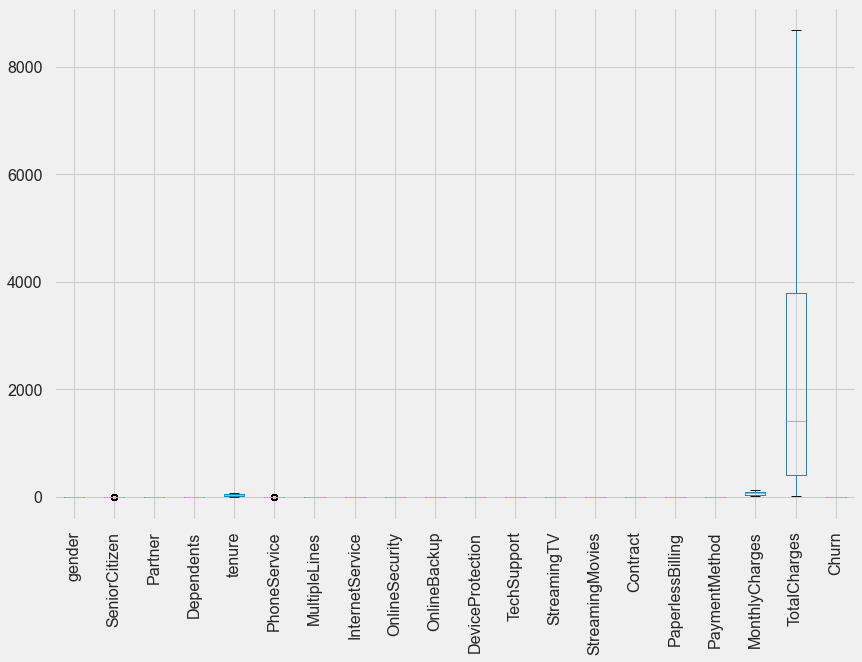

<Figure size 1080x720 with 0 Axes>

In [364]:
style.use('seaborn-poster')
style.use('fivethirtyeight')
g = df.boxplot()
g.set_xticklabels(rotation=90,labels=df.columns)
figure=plt.figure(figsize=(15,10))
#plt.xticks(rotation =45,fontsize =20)

#### From the above box plots we dont find any outliers

### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

### Distribution of the numerical cols

In [365]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [366]:
df_num = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

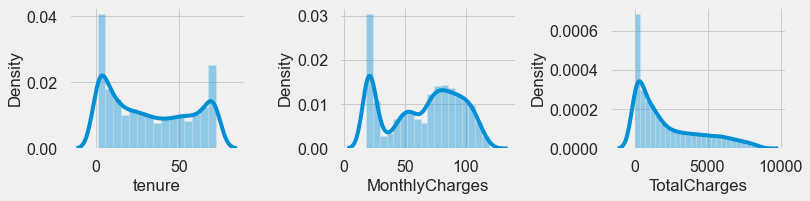

In [367]:
fig = plt.figure(figsize = (15, 8))
for i in range(0, len(df_num.columns)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.distplot(df_num[df_num.columns[i]])
    plt.tight_layout()

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= 'darkgrid')
plt.figure(figsize = (20,3))

j = 1
for i in df_num:
    plt.subplot(1,3,j)
    sns.boxplot(df_num[i])
    j += 1

#### From the above distpots we see that tenure, MonthlyCharges and TotalCharges columns are unevenly distributed. From above boxplot we see that Total Charges is right skewed.

### Classification of Categorical columns

In [369]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [370]:
df_cat = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [371]:
df_cat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype='object')

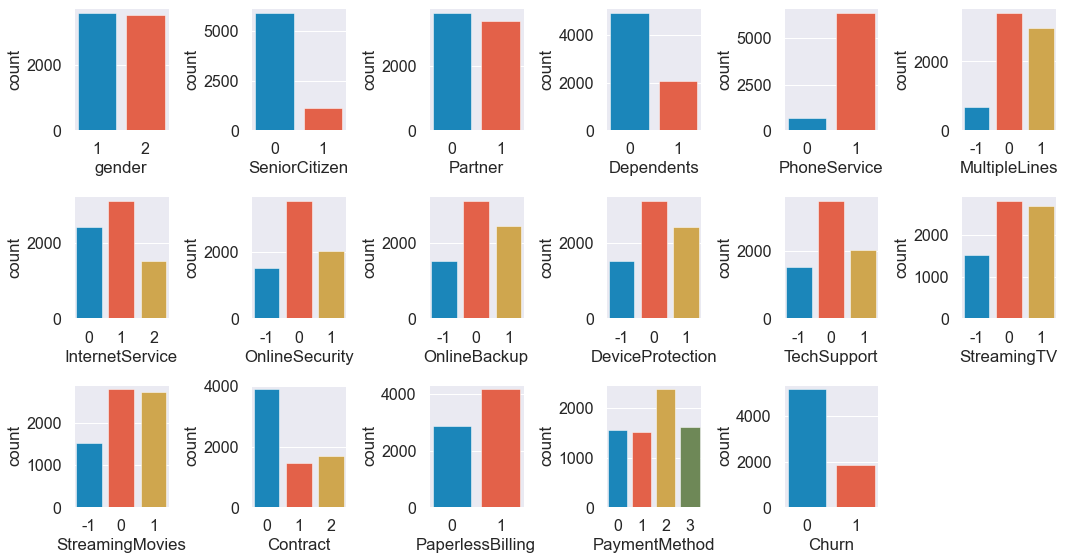

In [372]:
fig = plt.figure(figsize = (15, 8))
for i in range(0, len(df_cat.columns)):
    ax = fig.add_subplot(3, 6, i+1)
    sns.countplot(df_cat[df_cat.columns[i]])
    plt.tight_layout()

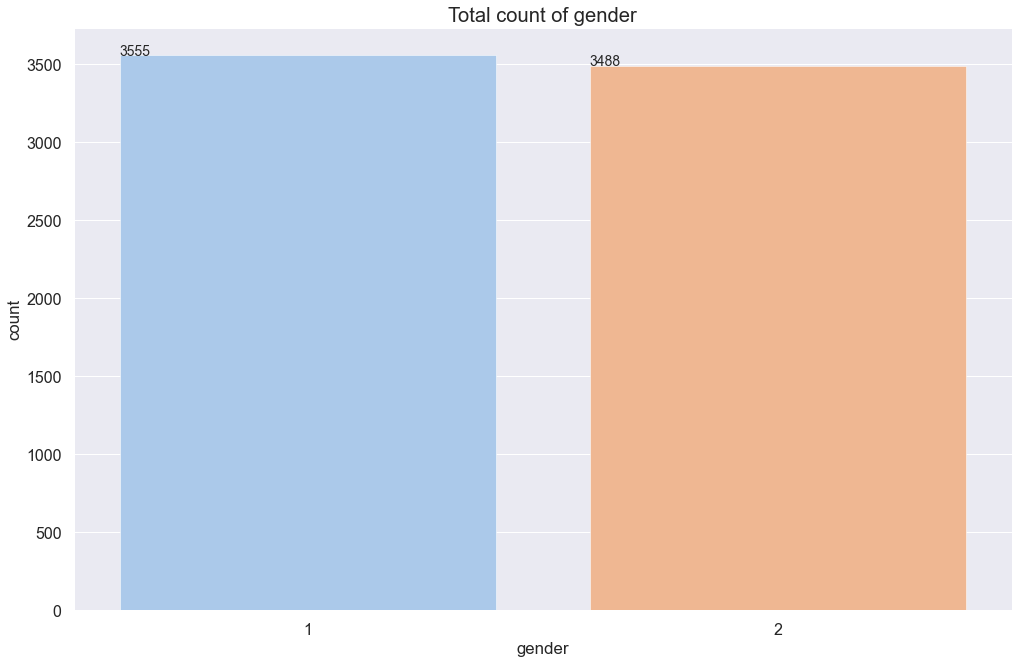

In [373]:
# Count of gender.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="gender", data=df_cat, 
                   order = df_cat['gender'].value_counts().index)
plt.title('Total count of gender')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that almost even distrbution between Males and Females in the telecom company. 3555 Males are there and 3488 Females are there.

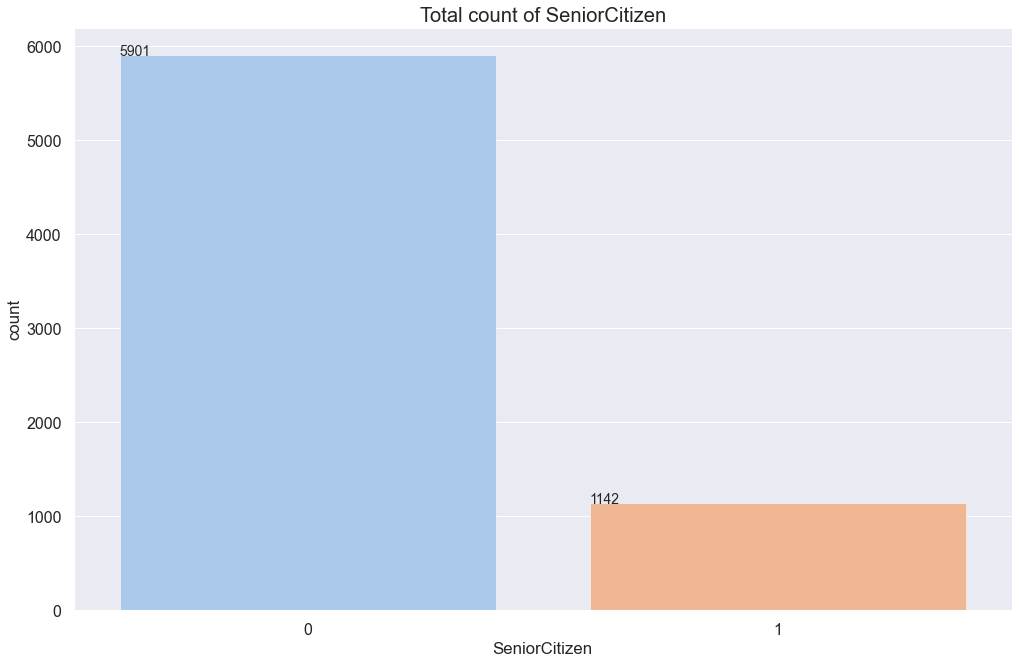

In [374]:
# Count of SeniorCitizen.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="SeniorCitizen", data=df_cat, 
                   order = df_cat['SeniorCitizen'].value_counts().index)
plt.title('Total count of SeniorCitizen')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that there are very less Senior Citizens as customers around 1142 out of 7043 customers in the telecom company. 

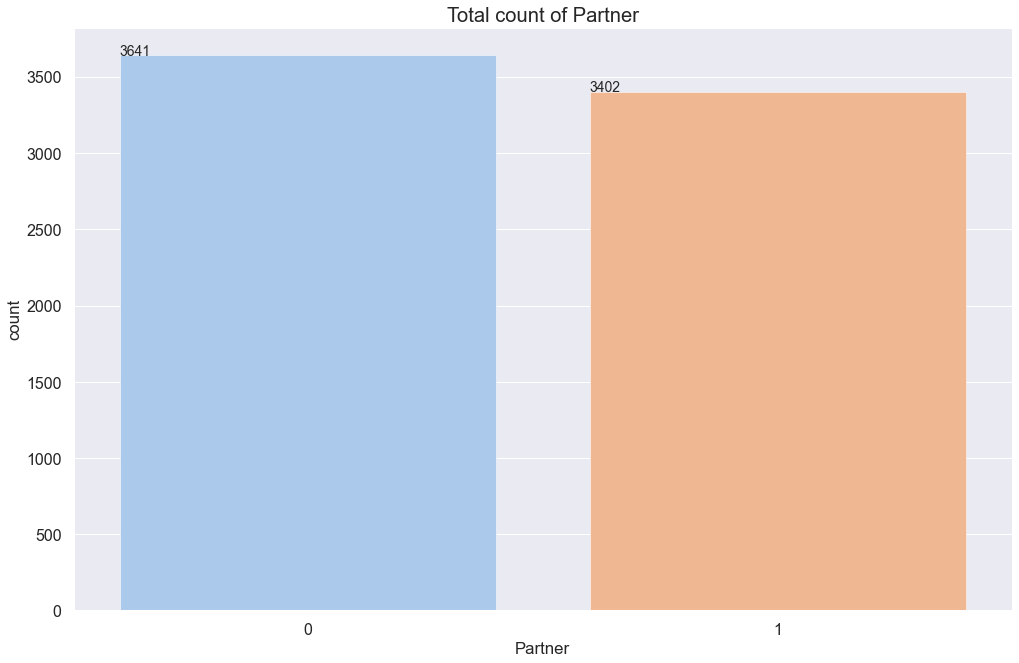

In [375]:
# Count of Partner.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="Partner", data=df_cat, 
                   order = df_cat['Partner'].value_counts().index)
plt.title('Total count of Partner')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 3402 customers are having partners in the telecom company. 

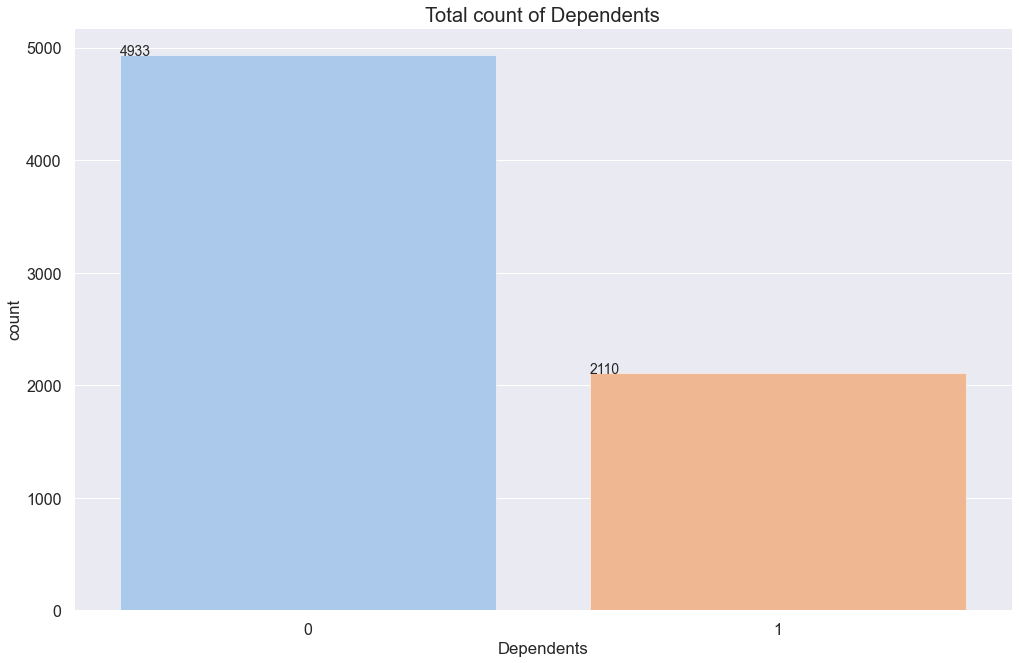

In [376]:
# Count of Dependents.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="Dependents", data=df_cat, 
                   order = df_cat['Dependents'].value_counts().index)
plt.title('Total count of Dependents')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that only 2110 customers are having dependents in the telecom company. 

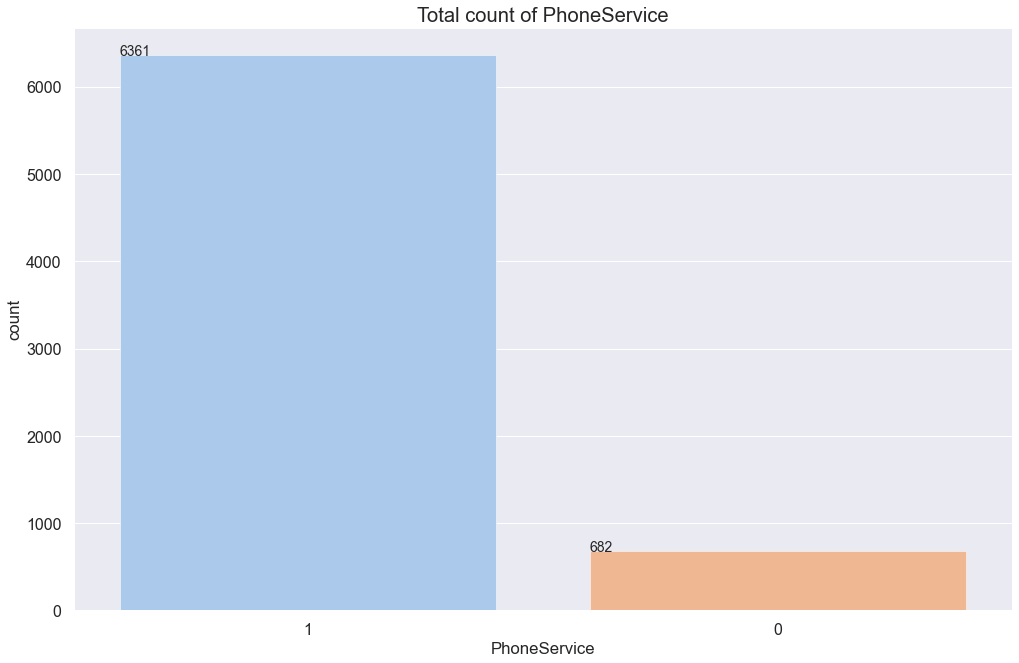

In [377]:
# Count of PhoneService.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="PhoneService", data=df_cat, 
                   order = df_cat['PhoneService'].value_counts().index)
plt.title('Total count of PhoneService')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that a lot of customers around 6361 customers signed up for Phone Service in the telecom company. 

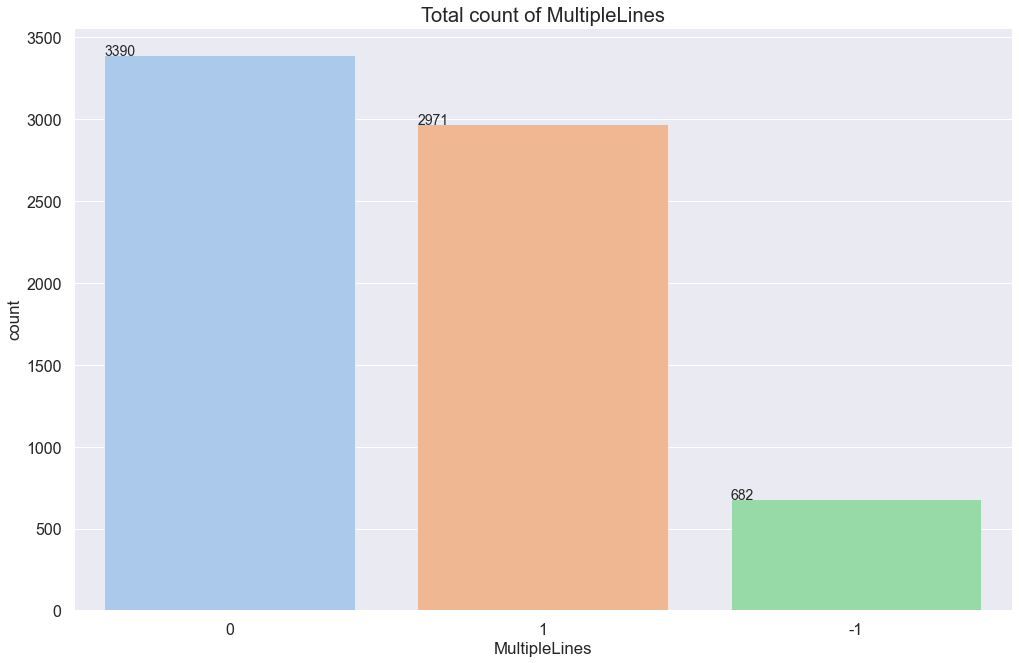

In [378]:
# Count of MultipleLines.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="MultipleLines", data=df_cat, 
                   order = df_cat['MultipleLines'].value_counts().index)
plt.title('Total count of MultipleLines')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2971 customers signed up for Multiple Lines and 682 dont have Phone Service in the telecom company. 

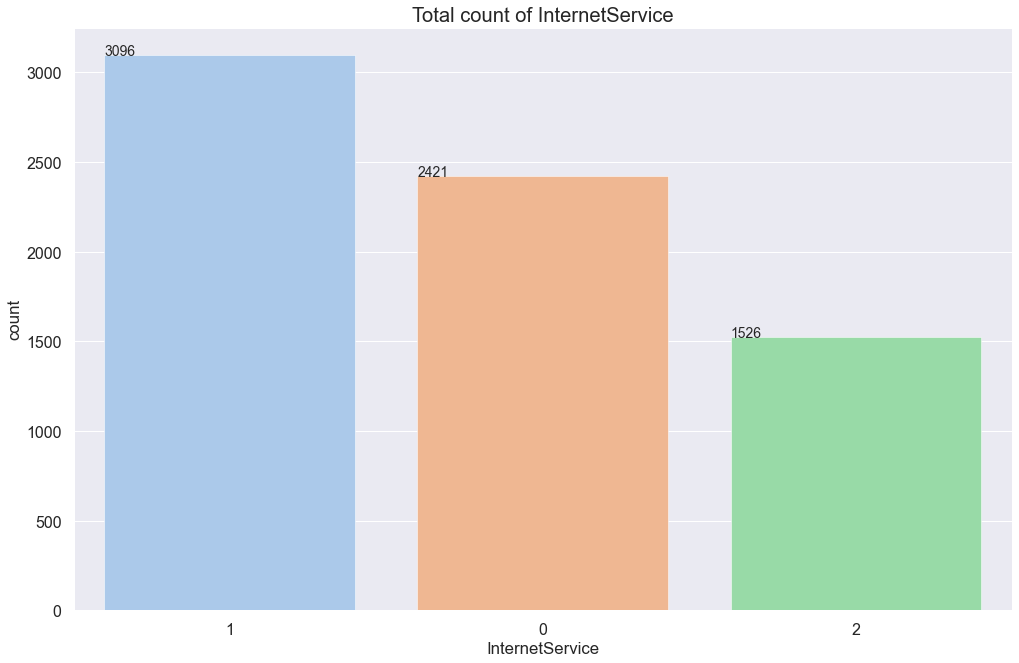

In [379]:
# Count of InternetService.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="InternetService", data=df_cat, 
                   order = df_cat['InternetService'].value_counts().index)
plt.title('Total count of InternetService')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 3096 customers signed up for Fiber Optic Internet Service and 2421 customers signed up for DSL Internet Service and rest 1526 dont have Internet Service in the telecom company. 

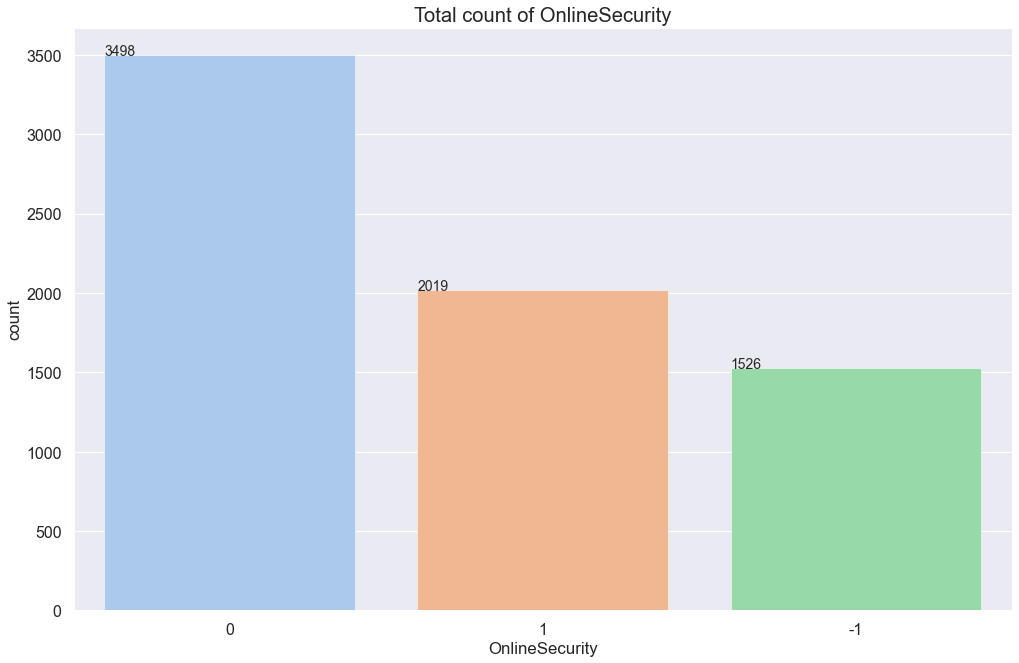

In [380]:
# Count of OnlineSecurity.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="OnlineSecurity", data=df_cat, 
                   order = df_cat['OnlineSecurity'].value_counts().index)
plt.title('Total count of OnlineSecurity')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2019 customers signed up for Online Security in Internet Services and 3498 customers did not sign up for Online Security in Internet Services and rest 1526 dont have Internet Service in the telecom company. 

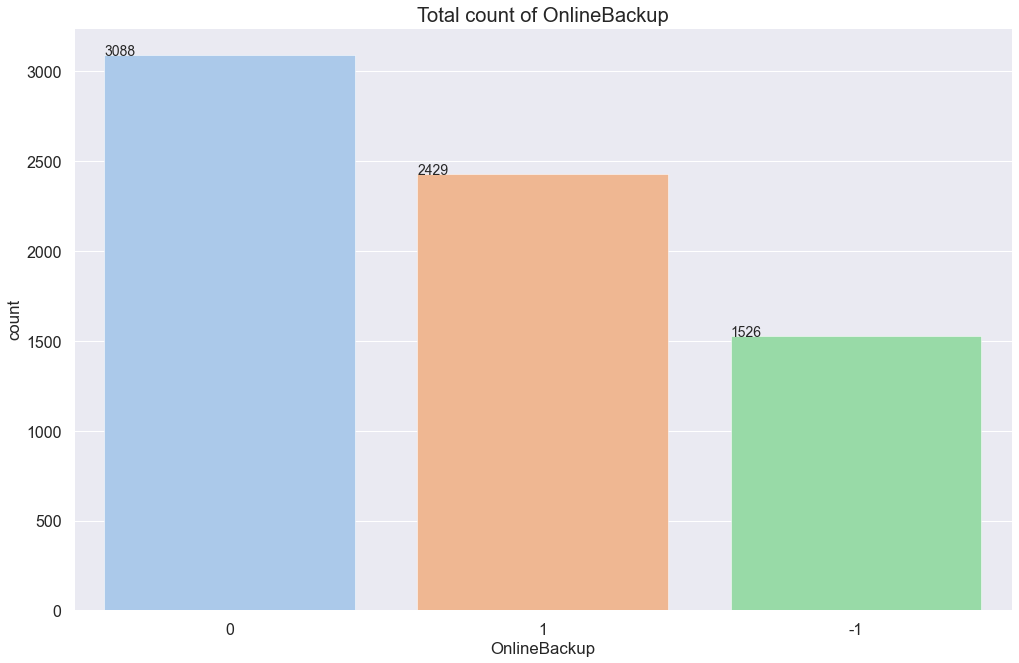

In [381]:
# Count of OnlineBackup.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="OnlineBackup", data=df_cat, 
                   order = df_cat['OnlineBackup'].value_counts().index)
plt.title('Total count of OnlineBackup')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2429 customers signed up for Online Backup in Internet Service and 3088 customers did not sign up for Online Backup in Internet Service and rest 1526 dont have Internet Service in the telecom company. 

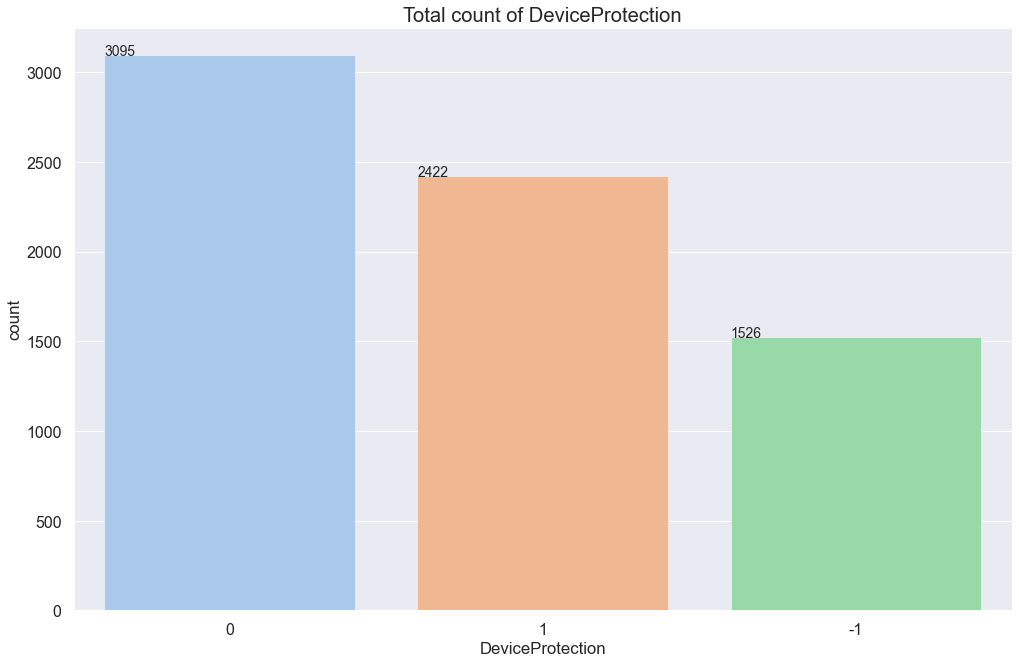

In [382]:
# Count of DeviceProtection.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="DeviceProtection", data=df_cat, 
                   order = df_cat['DeviceProtection'].value_counts().index)
plt.title('Total count of DeviceProtection')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2422 customers signed up for Device Protection in Internet Service and 3095 customers did not sign up for Device Protection in Internet Service and rest 1526 dont have Internet Service in the telecom company. 

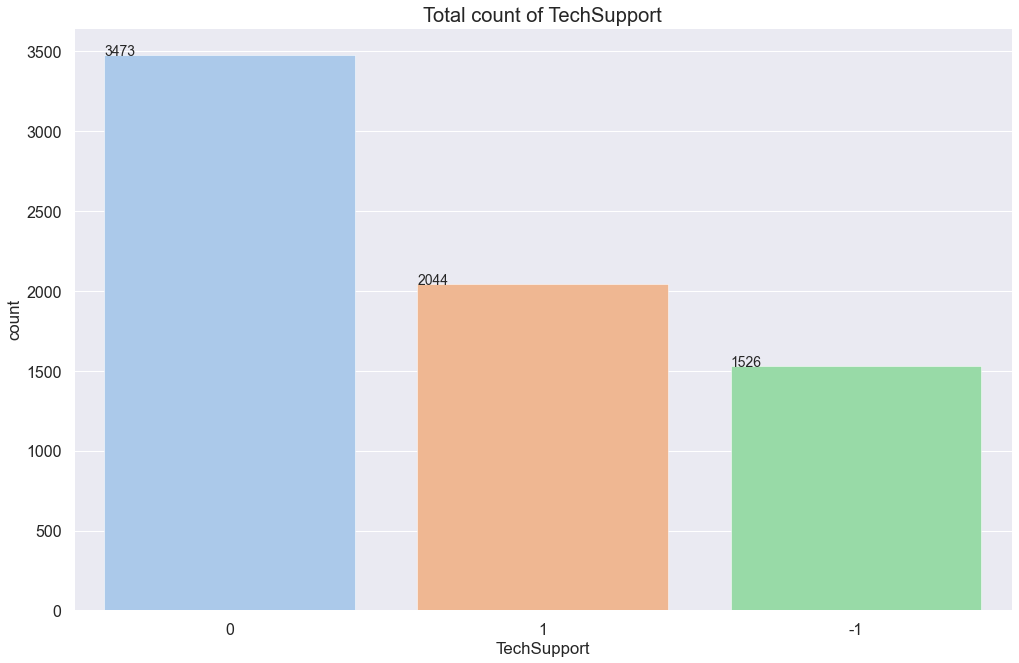

In [383]:
# Count of TechSupport.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="TechSupport", data=df_cat, 
                   order = df_cat['TechSupport'].value_counts().index)
plt.title('Total count of TechSupport')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2044 customers signed up for Tech Support in Internet Service and 3473 customers did not sign up for Tech Support in Internet Service and rest 1526 dont have Internet Service in the telecom company. 

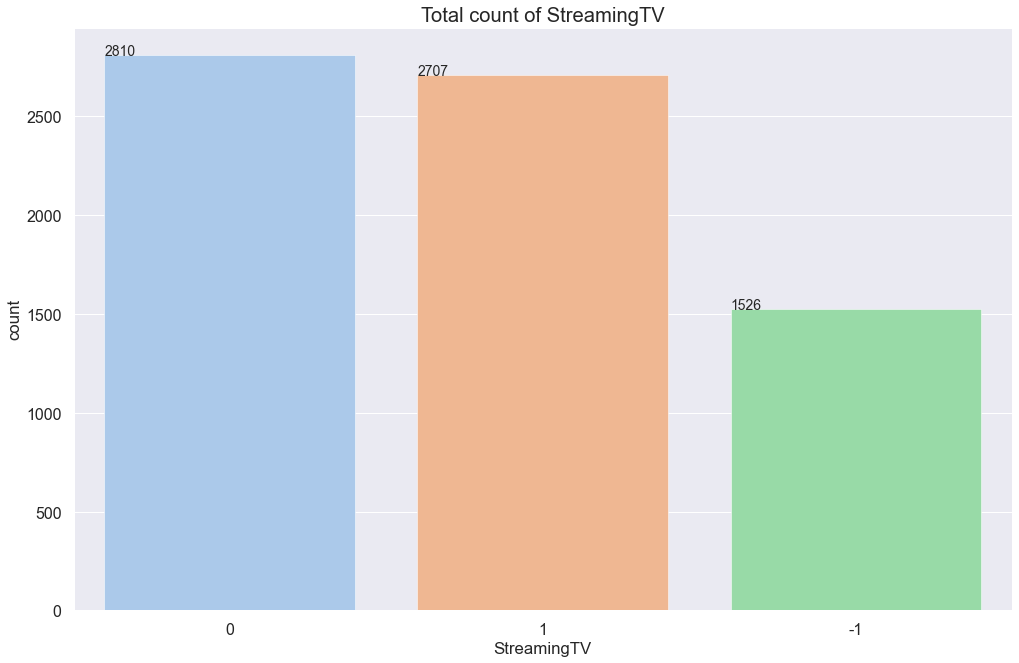

In [384]:
# Count of StreamingTV.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="StreamingTV", data=df_cat, 
                   order = df_cat['StreamingTV'].value_counts().index)
plt.title('Total count of StreamingTV')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2707 customers signed up for Streaming TV in Internet Service and 2810 customers did not sign up for Streaming TV in Internet Service and rest 1526 dont have Internet Service in the telecom company.

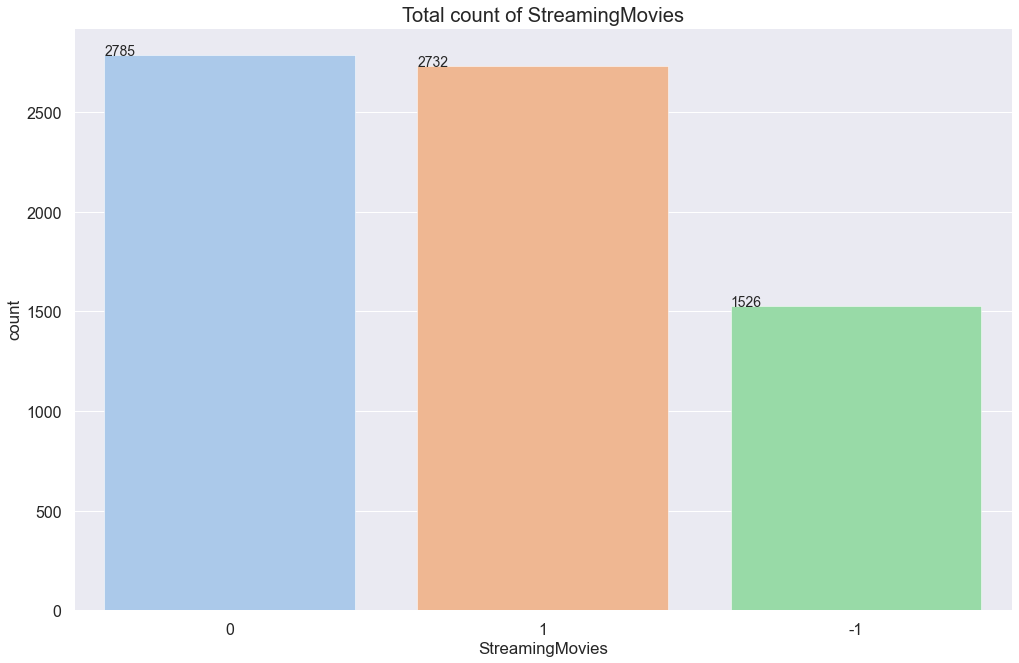

In [385]:
# Count of StreamingMovies.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="StreamingMovies", data=df_cat, 
                   order = df_cat['StreamingMovies'].value_counts().index)
plt.title('Total count of StreamingMovies')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2732 customers signed up for Streaming Movies in Internet Service and 2785 customers did not sign up for Streaming Movies in Internet Service and rest 1526 dont have Internet Service in the telecom company.

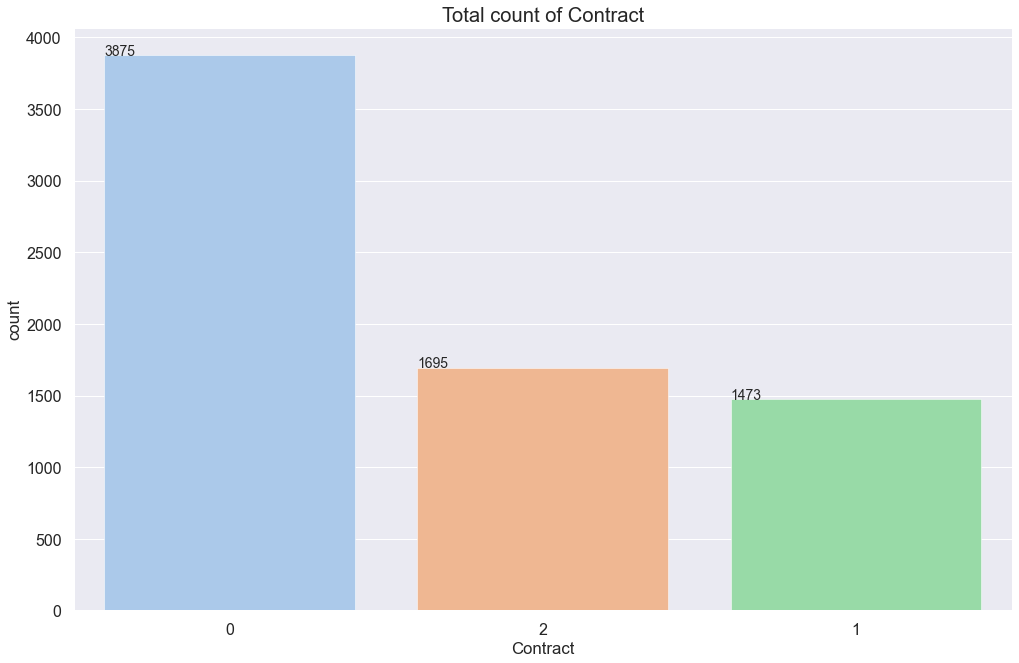

In [386]:
# Count of Contract.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="Contract", data=df_cat, 
                   order = df_cat['Contract'].value_counts().index)
plt.title('Total count of Contract')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 3875 customers are having Month to Month Contract, 1695 customers are having Two Year Contract and rest 1473 have One Year Contract in the telecom company.

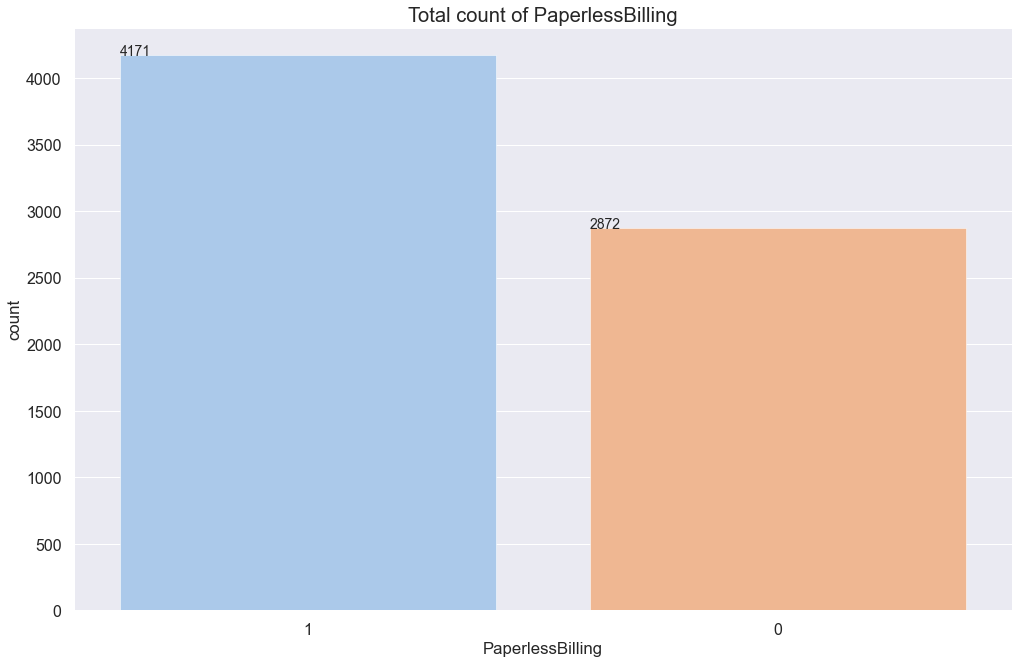

In [387]:
# Count of PaperlessBilling.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="PaperlessBilling", data=df_cat, 
                   order = df_cat['PaperlessBilling'].value_counts().index)
plt.title('Total count of PaperlessBilling')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that a major number of customers around 4171 out of 7043 are having Paperless Billing in the telecom company.

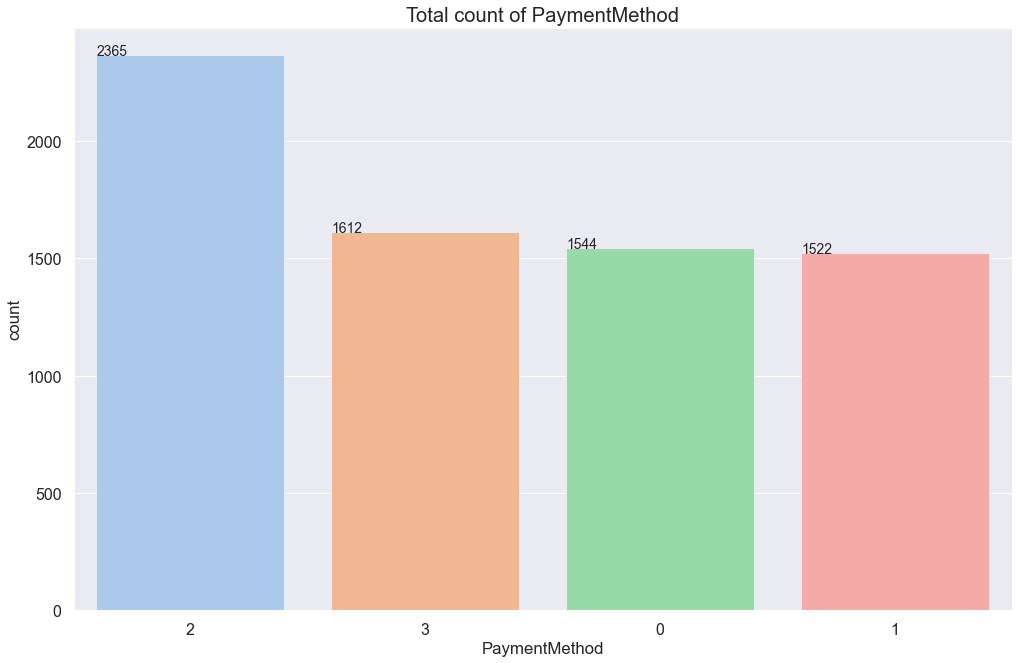

In [388]:
# Count of PaymentMethod.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="PaymentMethod", data=df_cat, 
                   order = df_cat['PaymentMethod'].value_counts().index)
plt.title('Total count of PaymentMethod')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 2365 customers are having Electronic Check payment method whereas 1612 have Mailed Check method and 1544 have Bank Transfer(Automatic) method and rest 1522 have Credit Card(Automatic) method, so around 3066 have automatic payment method and 3977 have manual payment method in the telecom company

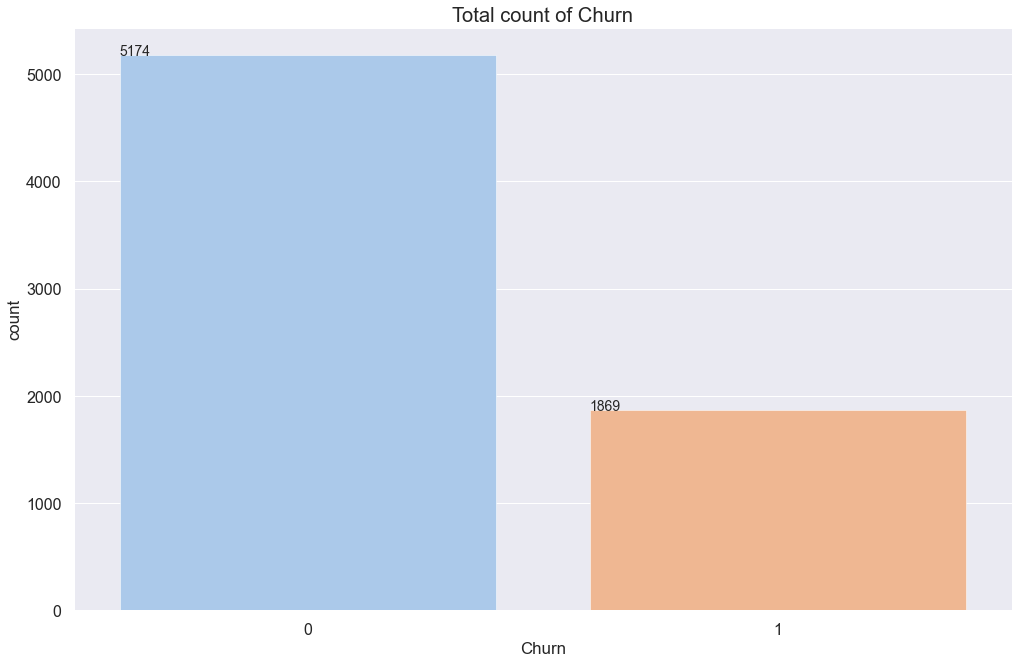

In [389]:
# Count of Churn.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="Churn", data=df_cat, 
                   order = df_cat['Churn'].value_counts().index)
plt.title('Total count of Churn')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

#### From the above count plot we see that around 1868 customer left within the last month.

In [390]:
df_num['Churn']=df['Churn']

In [391]:
df_num.head()

tenure  MonthlyCharges  TotalCharges  Churn
0       1           29.85         29.85      0
1      34           56.95       1889.50      0
2       2           53.85        108.15      1
3      45           42.30       1840.75      0
4       2           70.70        151.65      1

### Pair Plot for classification based on Churn

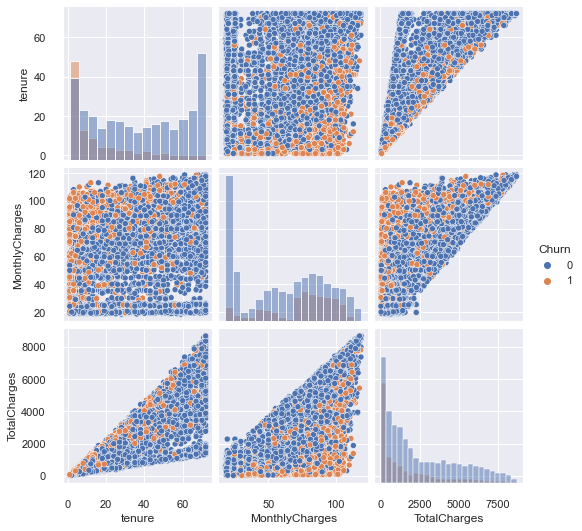

In [392]:
# Pair Plot
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# setting up plot style 
#style.use('seaborn-poster')
#style.use('fivethirtyeight')
sns.pairplot(df_num,diag_kind='hist',hue='Churn')

#### From the above pair plot we see some amount of linearlity between Total Charges and Tenure and also slight linerality between Monthly Charges and Total Charges

### Bar Plot for classification based on Churn

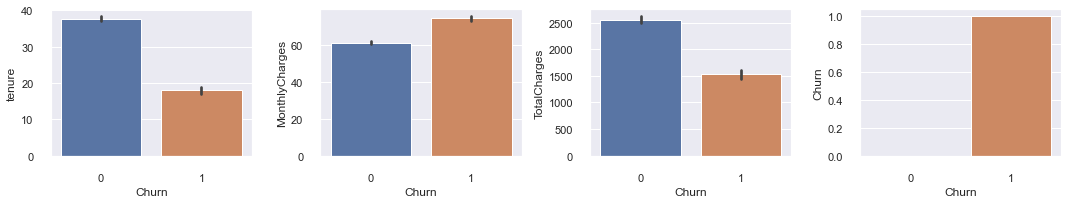

In [393]:
fig = plt.figure(figsize = (15, 8))
for i in range(0, len(df_num.columns)):
    ax = fig.add_subplot(3, 4, i+1)
    sns.barplot(df_num['Churn'], df_num[df_num.columns[i]])
    plt.tight_layout()

#### From the bar plots we see that we have TotalCharges column which has highest classification with Churn

In [394]:
df_num.drop('Churn', axis= 1, inplace= True)

### Checking correlation

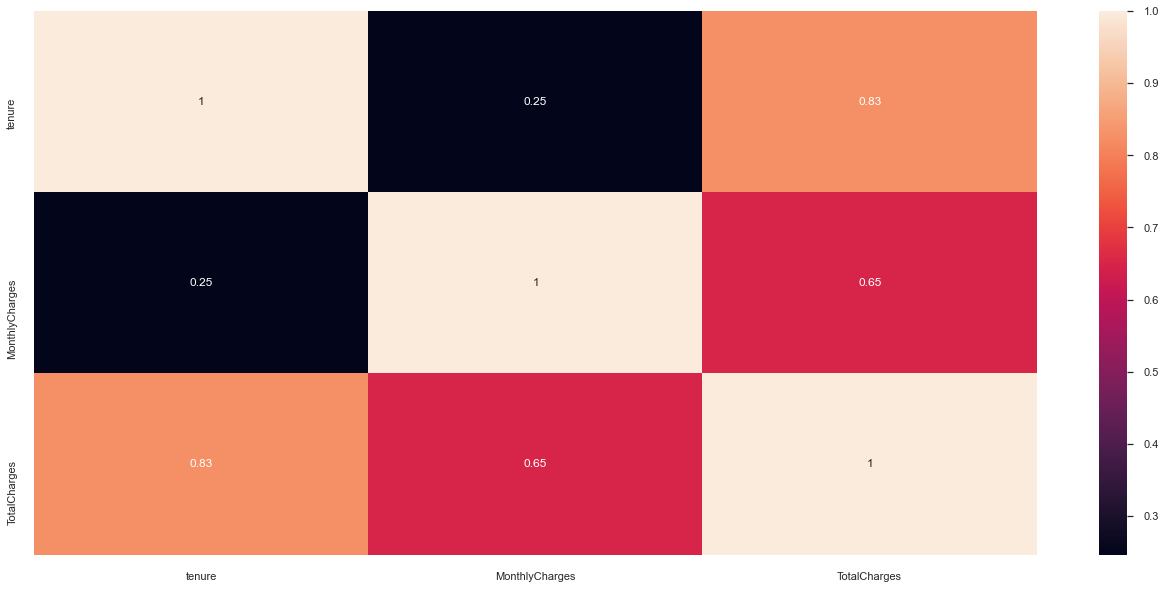

In [395]:
plt.figure(figsize= (20,10))
sns.heatmap(df_num.corr(), annot= True)
plt.show()

#### From the above heat map we see that TotalCharges and tenure have high correlation.

### Pandas Profiling

In [396]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [397]:
pandas_profiling.ProfileReport(df).to_file(output_file='Telecom.html')

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Data pre-processing:

### Segregate predictors vs target attributes

In [398]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
0       2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1              2           29.85         29.85      0
1       1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3           56.95       1889.50      0
2       1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1              3           53.85        108.15      1
3       1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0              0           42.30       1840.75      0
4       2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2           70.70        151.65      1

In [399]:
from sklearn.model_selection import train_test_split
# Transform data into features and target
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [400]:
X

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0          2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1              2           29.85         29.85
1          1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3           56.95       1889.50
2          1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1              3           53.85        108.15
3          1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0              0           42.30       1840.75
4          2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2           70.70        151.65
...      ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...            ...             ...           ...
7038       1              0        1           1      24             1              1                0               1             0                 1            1            1                1         1                 1              3           84.80       1990.50
7039       2              0        1           1      72             1              1                1               0             1                 1            0            1                1         1                 1              1          103.20       7362.90
7040       2              0        1           1      11             0             -1                0               1             0                 0            0            0                0         0                 1              2           29.60        346.45
7041       1              1        1           0       4             1              1                1               0             0                 0            0            0                0         0                 1              3           74.40        306.60
7042       1              0        0           0      66             1              0                1               1             0                 1            1            1                1         2                 1              0          105.65       6844.50

[7043 rows x 19 columns]

In [401]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

###  Check for target balancing.

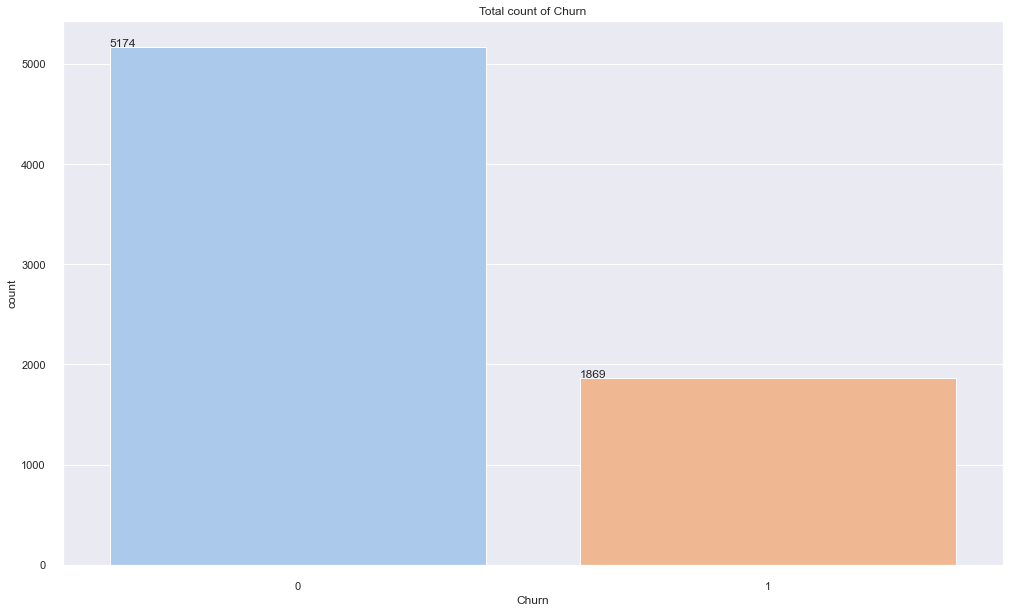

In [402]:
# Count of Churn.
plt.figure(figsize=(15,10))
sns.set_palette("pastel")
ax = sns.countplot(x="Churn", data=df, 
                   order = df['Churn'].value_counts().index)
plt.title('Total count of Churn')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

### Applying SMOTE to balance the two classes.

In [403]:
from imblearn.over_sampling import SMOTE

In [404]:
oversample = SMOTE()
X1,Y1 = oversample.fit_resample(X, Y)

In [405]:
X1

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0           2              0        1           0       1             0             -1                0               0             1                 0            0            0                0         0                 1              2       29.850000     29.850000
1           1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3       56.950000   1889.500000
2           1              0        0           0       2             1              0                0               1             1                 0            0            0                0         0                 1              3       53.850000    108.150000
3           1              0        0           0      45             0             -1                0               1             0                 1            1            0                0         1                 0              0       42.300000   1840.750000
4           2              0        0           0       2             1              0                1               0             0                 0            0            0                0         0                 1              2       70.700000    151.650000
...       ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...            ...             ...           ...
10343       1              0        0           0       1             1              0                1               0             0                 0            0            0                0         0                 1              2       68.531170     68.531170
10344       1              0        0           0      17             1              1                1               0             0                 0            0            0                0         0                 0              2       86.695541   1458.860327
10345       1              0        1           0      19             1              0                1               0             0                 0            0            0                0         0                 1              2       80.778415   1465.103893
10346       1              0        1           1      60             1              1                0               0             0                 1            0            1                1         2                 1              1       89.313329   5293.331941
10347       1              0        0           0      40             1              1                1               0             0                 0            0            1                0         0                 1              2       89.639104   3543.166310

[10348 rows x 19 columns]

In [406]:
Y1

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int64

In [407]:
Y1.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

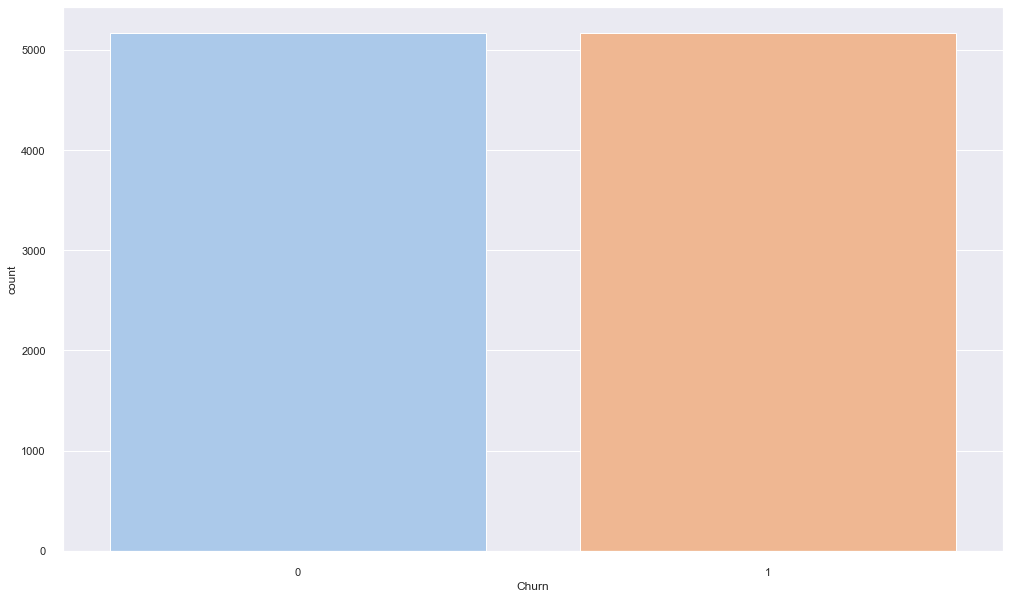

In [408]:
plt.figure(figsize=(15,10))
sns.countplot(Y1)
plt.show()

### Perform train-test split.

In [409]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, 
                                                    test_size = 0.30, random_state = 42,stratify = Y1)

In [410]:
print('X_train ', X_train.shape)
print('X_test ', X_test.shape)
print('Y_train ', Y_train.shape)
print('Y_test ', Y_test.shape)

X_train  (7243, 19)
X_test  (3105, 19)
Y_train  (7243,)
Y_test  (3105,)


### Check if the train and test data have similar statistical characteristics when compared with original data

In [411]:
print(Y1.mean(), Y_train.mean(), Y_test.mean())

0.5 0.5000690321689908 0.4998389694041868


In [412]:
X_train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
1138       1              0        1           1      11             1              1                0               1             0                 0            0            1                0         0                 1              0       65.150000    723.350000
8904       1              0        0           0      38             1              0                1               0             0                 0            0            0                1         0                 1              2       98.892375   3593.909587
919        2              0        0           0      21             1              0                1               0             1                 1            1            1                1         1                 1              3      104.550000   2239.400000
383        1              0        0           0       1             1              1                1               0             1                 0            0            0                1         0                 1              1       90.850000     90.850000
7369       1              0        0           0      42             1              1                1               0             0                 0            0            1                1         0                 1              2      101.287777   4353.422831
...      ...            ...      ...         ...     ...           ...            ...              ...             ...           ...               ...          ...          ...              ...       ...               ...            ...             ...           ...
5988       1              0        1           1      12             1              0                2              -1            -1                -1           -1           -1               -1         2                 0              0       21.050000    262.050000
9314       1              0        0           0       8             1              0                0               0             0                 0            0            0                0         0                 1              2       45.053733    437.437326
2010       1              0        0           0       5             1              1                1               0             0                 0            0            0                0         0                 1              0       75.900000    357.750000
76         2              0        0           0      46             1              0                0               0             0                 0            0            0                1         1                 0              1       55.650000   2688.850000
6039       1              1        1           0      27             0             -1                0               0             0                 0            0            0                1         0                 0              0       36.500000   1032.000000

[7243 rows x 19 columns]

## 5. Model training, testing and tuning:

### Train and test all ensemble models taught in the learning module.

### Display the classification accuracies for train and test data.

### Apply all the possible tuning techniques to train the best model for the given data.

### Build Decision Tree Model

In [413]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [414]:
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

0.998343227944222
0.7867954911433173


In [415]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
df_File = open('df.dot','w')
dot_data = export_graphviz(dTree, out_file=df_File, feature_names = list(X_train), class_names = list(train_char_label))
df_File.close()

In [416]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng df.dot -o df.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("df.png"))

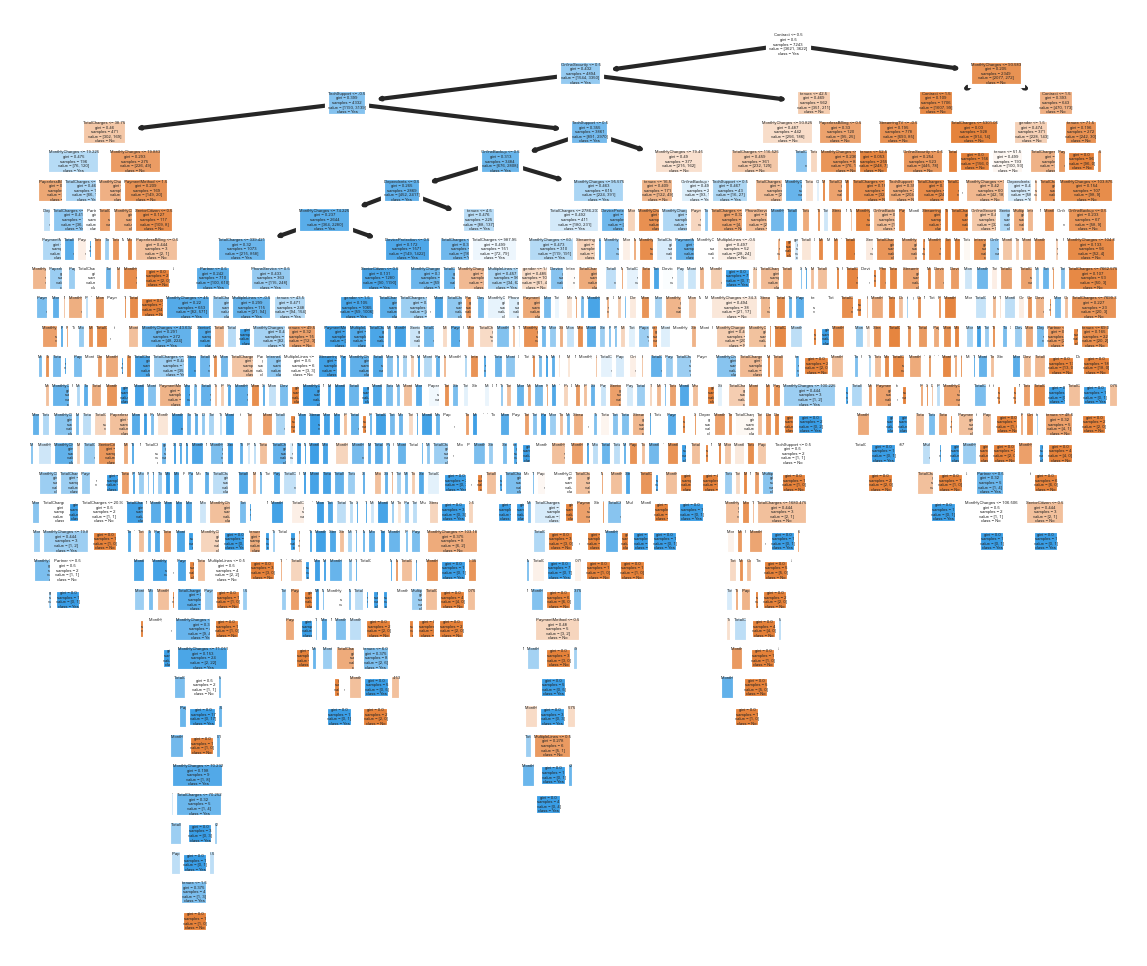

In [417]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

### Applying Randomized Search Cross Validation for Fine Tuning Decision Tree

In [418]:
from sklearn.model_selection import RandomizedSearchCV
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}

In [419]:
RS_DT = RandomizedSearchCV(estimator=dTree, param_distributions = grid_param, cv=20, n_jobs =-1, verbose = 3)

In [420]:
DT = RS_DT.fit(X_train,Y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


In [421]:
DT.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 8,
 'criterion': 'entropy'}

In [423]:
dTree_reg = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4, min_samples_leaf = 4, max_depth = 8,random_state=1)
dTree_reg.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=4, random_state=1)

In [424]:
print(dTree_reg.score(X_train, Y_train))
print(dTree_reg.score(X_test, Y_test))

0.8398453679414607
0.7987117552334944


### Confusion Matrix for Decision Tree on TEST data

0.7987117552334944


<AxesSubplot:>

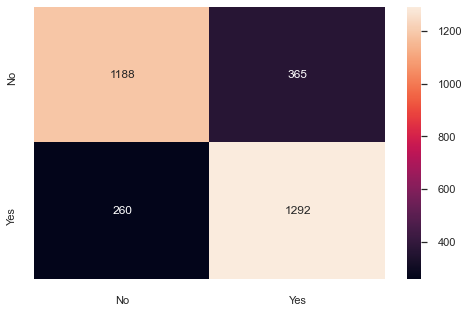

In [425]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(dTree_reg.score(X_test , Y_test))
Y_predict_test = dTree_reg.predict(X_test)

cm=metrics.confusion_matrix(Y_test, Y_predict_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Confusion Matrix for Decision Tree on TRAIN data

0.8398453679414607


<AxesSubplot:>

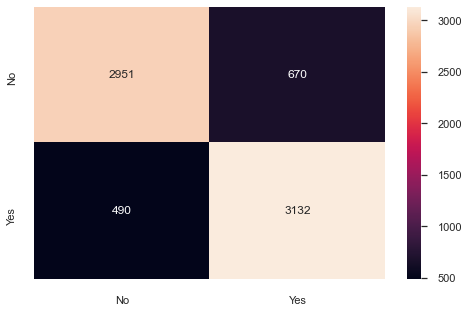

In [426]:
print(dTree_reg.score(X_train , Y_train))
Y_predict_train = dTree_reg.predict(X_train)

cm=metrics.confusion_matrix(Y_train, Y_predict_train, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Classification Report for Decision Tree on test data

In [427]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test,digits=3))

              precision    recall  f1-score   support

           0      0.820     0.765     0.792      1553
           1      0.780     0.832     0.805      1552

    accuracy                          0.799      3105
   macro avg      0.800     0.799     0.798      3105
weighted avg      0.800     0.799     0.798      3105



### Classification Report for Decision Tree on training data

In [428]:
print(classification_report(Y_train, Y_predict_train,digits=3))

              precision    recall  f1-score   support

           0      0.858     0.815     0.836      3621
           1      0.824     0.865     0.844      3622

    accuracy                          0.840      7243
   macro avg      0.841     0.840     0.840      7243
weighted avg      0.841     0.840     0.840      7243



### AUC- ROC Curve for Decision Tree on Train data.

AUC: 0.840


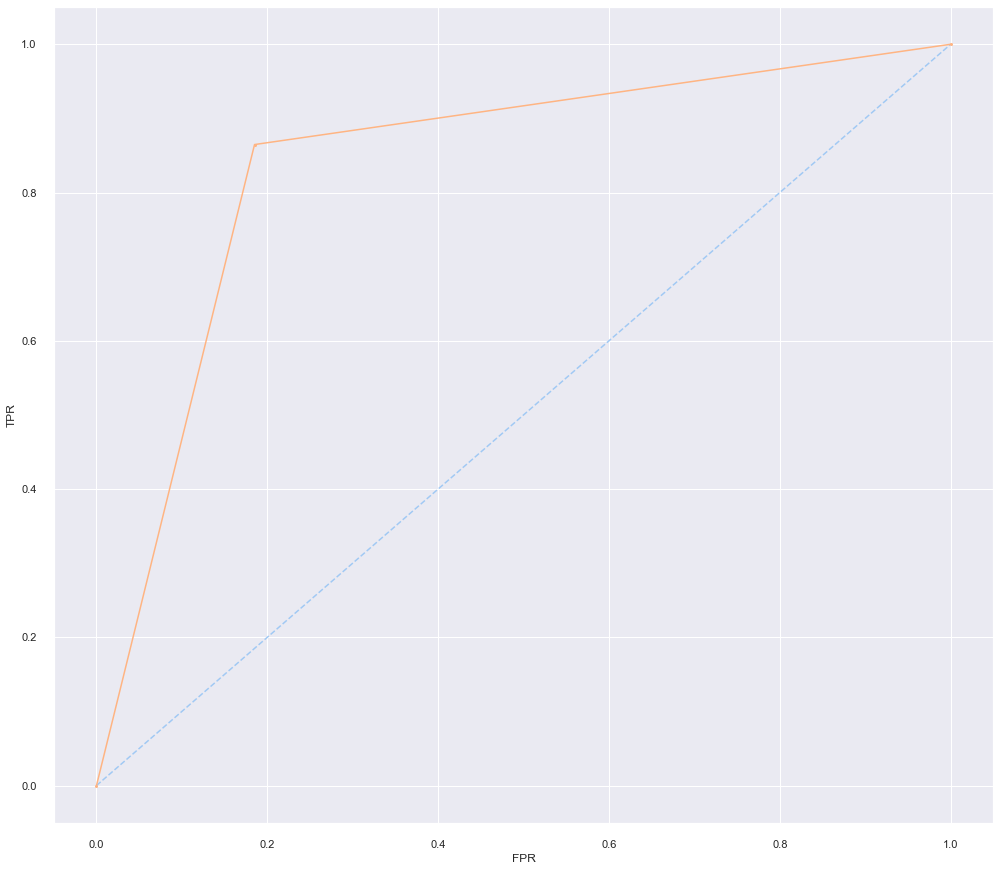

In [429]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_predict_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_predict_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for Decision Tree on Test data.

AUC: 0.799


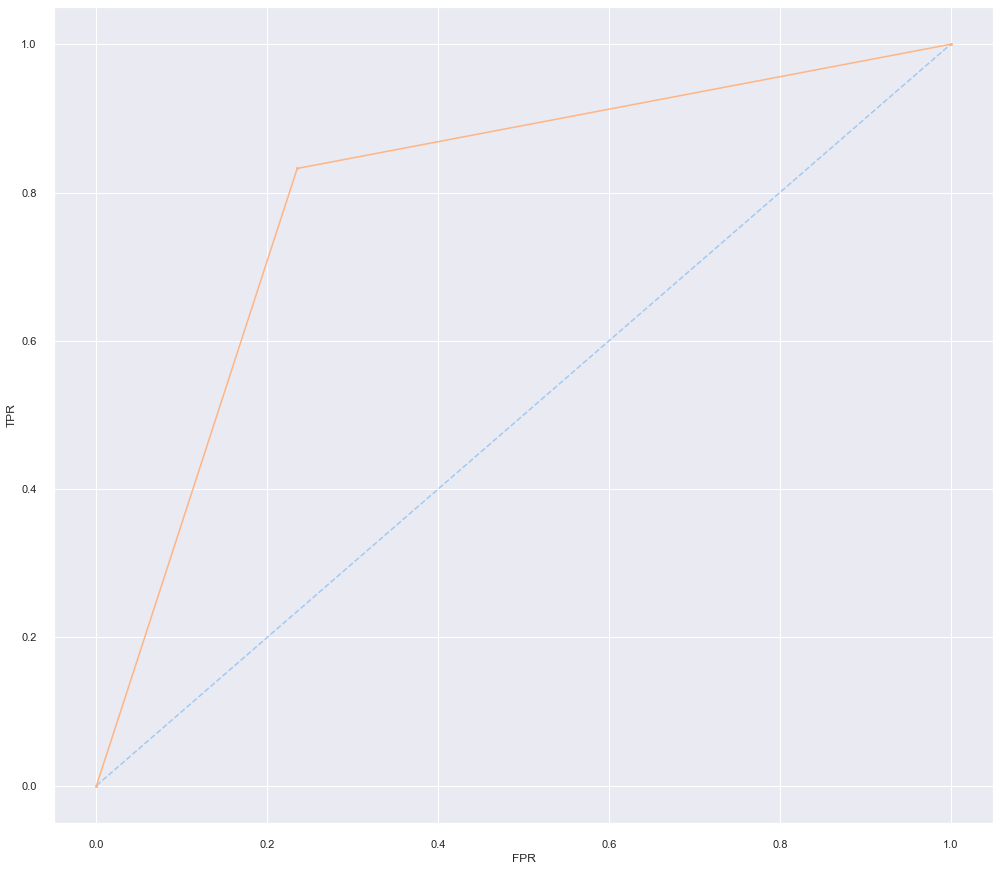

In [430]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_predict_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

In [431]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Sno':['1'], 'Method':['Decision Tree'], 'Initial Test Accuracy': dTree.score(X_test , Y_test), 'Initial Train Accuracy': dTree.score(X_train , Y_train),'Regularised Test Accuracy': dTree_reg.score(X_test , Y_test), 'Regularised Train Accuracy': dTree_reg.score(X_train , Y_train)})
resultsDf = resultsDf[['Sno', 'Method', 'Initial Test Accuracy', 'Initial Train Accuracy', 'Regularised Test Accuracy', 'Regularised Train Accuracy']]
resultsDf

Sno         Method  Initial Test Accuracy  Initial Train Accuracy  Regularised Test Accuracy  Regularised Train Accuracy
0   1  Decision Tree               0.786795                0.998343                   0.798712                    0.839845

### We generalised the model with Random CV. Huge amount of overfitting was reduced!!

===================================================================================================================================================================================

### Bagging Model

In [432]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)

In [433]:
print(bgcl.score(X_train, Y_train))
print(bgcl.score(X_test, Y_test))

0.997790970592296
0.8383252818035427


### Applying Randomized Search Cross Validation for Fine Tuning Bagging Classifier

In [434]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'n_estimators' : [10,20,30,40,50,60,70, 80,90,100,115,130],
    'max_samples' : range(2,20,1),
    'max_features' : range(2,20,1)
}

In [435]:
RS_BG = RandomizedSearchCV(estimator=bgcl, param_distributions = grid_param, cv=5, n_jobs =-1, verbose = 3)

In [436]:
BG = RS_BG.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [437]:
BG.best_params_

{'n_estimators': 30, 'max_samples': 15, 'max_features': 9}

In [440]:
bgcl_reg = BaggingClassifier(n_estimators=30,random_state=1,max_samples=15,max_features=9)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl_reg = bgcl_reg.fit(X_train, Y_train)

In [441]:
print(bgcl_reg.score(X_train, Y_train))
print(bgcl_reg.score(X_test, Y_test))

0.766671268811266
0.7603864734299517


### Confusion Matrix for Bagging on TEST data

0.7603864734299517


<AxesSubplot:>

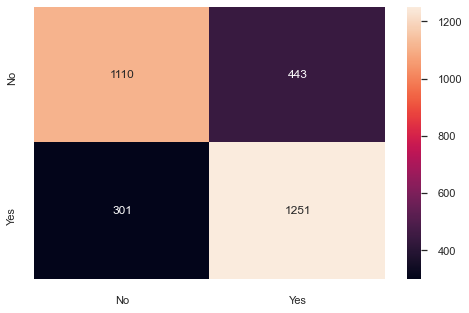

In [442]:
Y_predict_test = bgcl_reg.predict(X_test)

print(bgcl_reg.score(X_test , Y_test))

cm=metrics.confusion_matrix(Y_test, Y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Confusion Matrix for Bagging on TRAINING data

0.766671268811266


<AxesSubplot:>

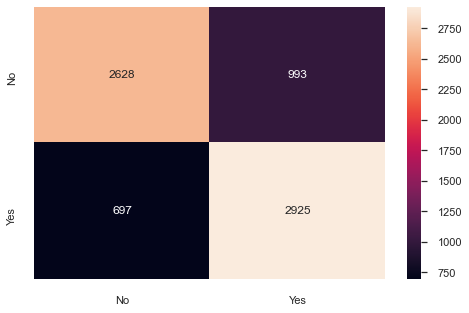

In [443]:
Y_predict_train = bgcl_reg.predict(X_train)

print(bgcl_reg.score(X_train , Y_train))

cm=metrics.confusion_matrix(Y_train, Y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Classification Report for Bagging on test data

In [444]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test,digits=3))

              precision    recall  f1-score   support

           0      0.787     0.715     0.749      1553
           1      0.738     0.806     0.771      1552

    accuracy                          0.760      3105
   macro avg      0.763     0.760     0.760      3105
weighted avg      0.763     0.760     0.760      3105



### Classification Report for Bagging on training data

In [445]:
print(classification_report(Y_train, Y_predict_train,digits=3))

              precision    recall  f1-score   support

           0      0.790     0.726     0.757      3621
           1      0.747     0.808     0.776      3622

    accuracy                          0.767      7243
   macro avg      0.768     0.767     0.766      7243
weighted avg      0.768     0.767     0.766      7243



### AUC- ROC Curve for Bagging on Train data.

AUC: 0.767


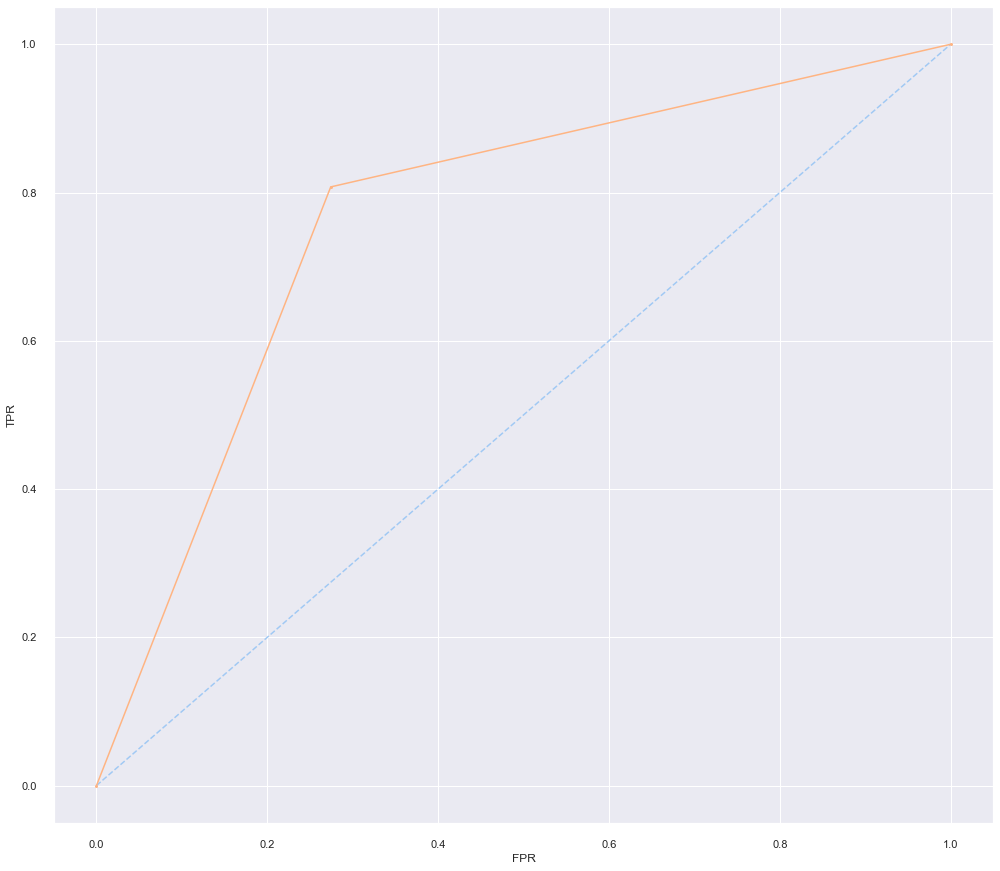

In [446]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_predict_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_predict_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for Bagging on Test data.

AUC: 0.760


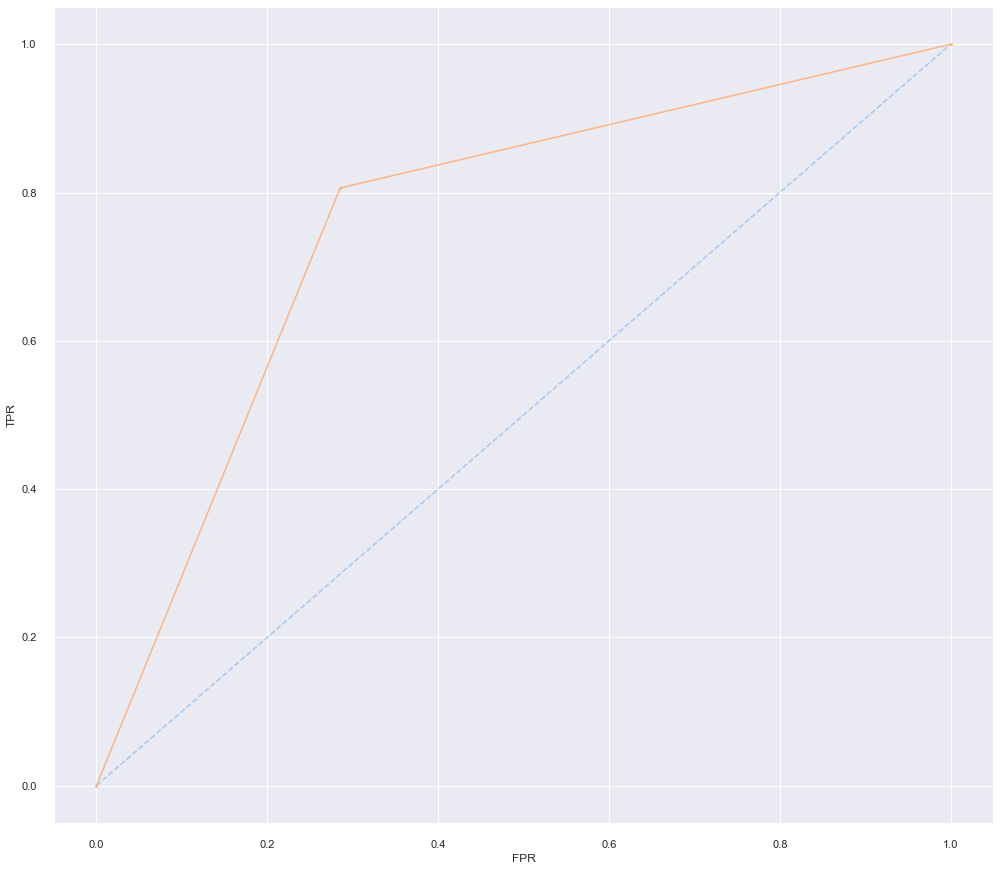

In [447]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_predict_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

In [448]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Sno':['2'], 'Method':['Bagging'],'Initial Test Accuracy': bgcl.score(X_test , Y_test), 'Initial Train Accuracy': bgcl.score(X_train , Y_train), 'Regularised Test Accuracy': bgcl_reg.score(X_test , Y_test), 'Regularised Train Accuracy': bgcl_reg.score(X_train , Y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Sno', 'Method', 'Initial Test Accuracy', 'Initial Train Accuracy', 'Regularised Test Accuracy', 'Regularised Train Accuracy']]
resultsDf

Sno         Method  Initial Test Accuracy  Initial Train Accuracy  Regularised Test Accuracy  Regularised Train Accuracy
0   1  Decision Tree               0.786795                0.998343                   0.798712                    0.839845
0   2        Bagging               0.838325                0.997791                   0.760386                    0.766671

### We generalised the model with Random CV. Huge amount of overfitting was reduced!!

===================================================================================================================================================================================

### RandomForest Classifier Model

In [449]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, Y_train)

In [450]:
print(rfcl.score(X_train, Y_train))
print(rfcl.score(X_test, Y_test))

0.9976529062543145
0.8402576489533011


In [451]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [10,20,30,40,50,60,70,80,90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [452]:
RS_RF = RandomizedSearchCV(estimator=rfcl, param_distributions = grid_param, cv=5, n_jobs =-1, verbose = 3)

In [453]:
RF = RS_RF.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [454]:
RF.best_params_

{'n_estimators': 90,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'entropy'}

In [455]:
rfcl_reg = RandomForestClassifier(n_estimators=90,random_state=1,min_samples_split=9,min_samples_leaf=5,max_features='log2',max_depth=16,criterion='entropy')
rfcl_reg = rfcl_reg.fit(X_train, Y_train)

In [456]:
print(rfcl_reg.score(X_train, Y_train))
print(rfcl_reg.score(X_test, Y_test))

0.8927240093883749
0.8322061191626409


### Confusion Matrix for Random Forest on TEST data

0.8322061191626409


<AxesSubplot:>

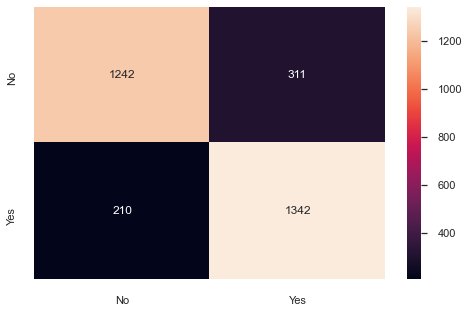

In [457]:
Y_predict_test = rfcl_reg.predict(X_test)

print(rfcl_reg.score(X_test , Y_test))

cm=metrics.confusion_matrix(Y_test, Y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Confusion Matrix for Random Forest on TRAINING data

0.8927240093883749


<AxesSubplot:>

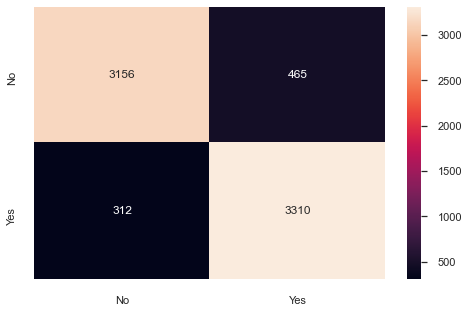

In [458]:
Y_predict_train = rfcl_reg.predict(X_train)

print(rfcl_reg.score(X_train , Y_train))

cm=metrics.confusion_matrix(Y_train, Y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Classification Report for Random Forest on test data

In [459]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test,digits=3))

              precision    recall  f1-score   support

           0      0.855     0.800     0.827      1553
           1      0.812     0.865     0.837      1552

    accuracy                          0.832      3105
   macro avg      0.834     0.832     0.832      3105
weighted avg      0.834     0.832     0.832      3105



### Classification Report for Random Forest on training data

In [460]:
print(classification_report(Y_train, Y_predict_train,digits=3))

              precision    recall  f1-score   support

           0      0.910     0.872     0.890      3621
           1      0.877     0.914     0.895      3622

    accuracy                          0.893      7243
   macro avg      0.893     0.893     0.893      7243
weighted avg      0.893     0.893     0.893      7243



### AUC- ROC Curve for Random Forest on Train data.

AUC: 0.893


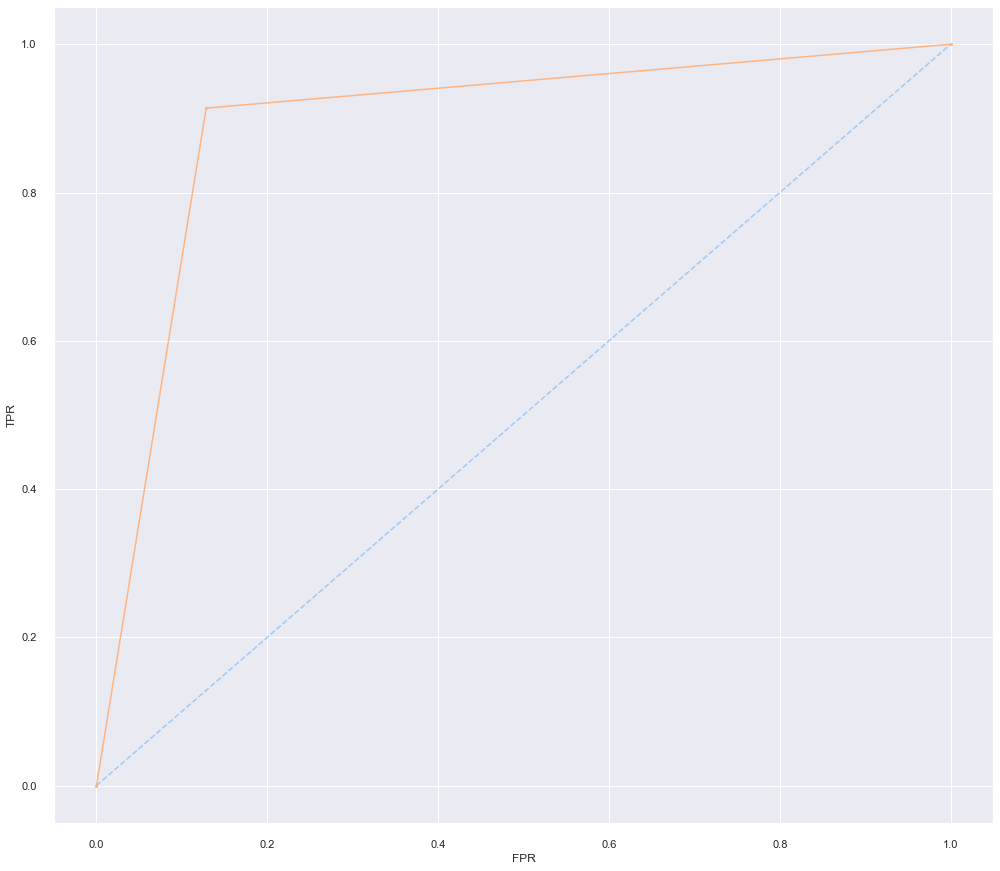

In [461]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_predict_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_predict_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for Random Forest on Test data.

AUC: 0.832


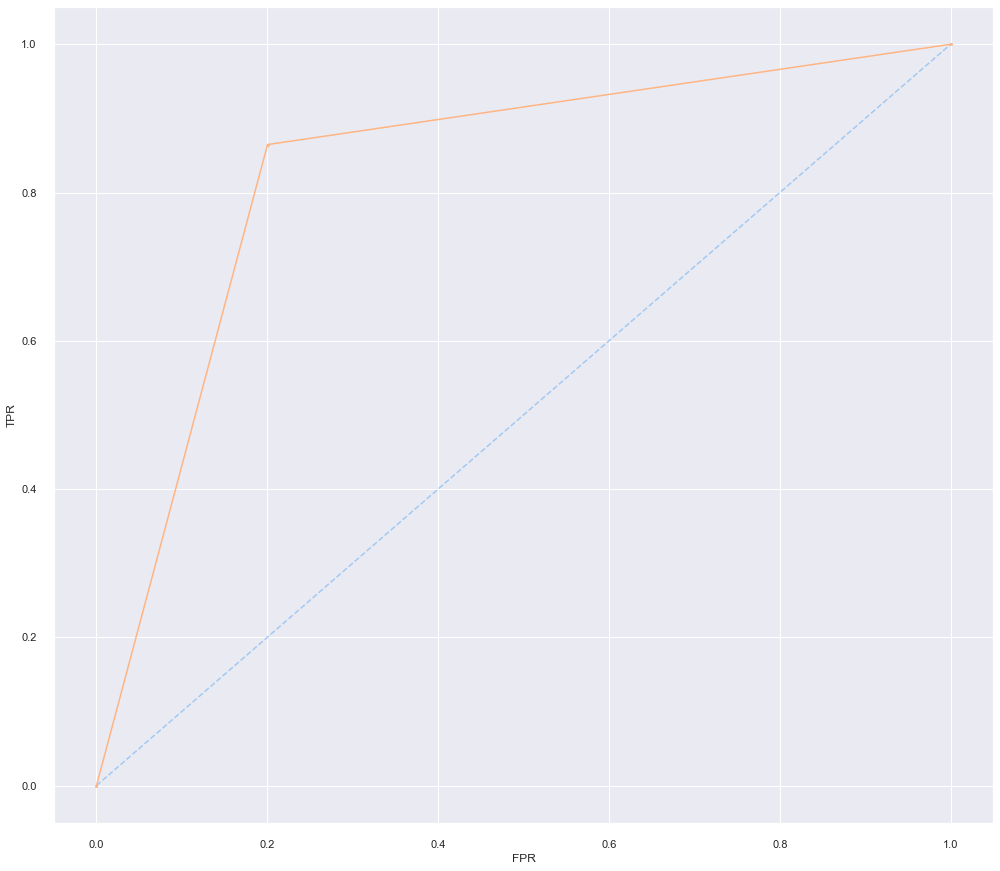

In [462]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_predict_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

In [463]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Sno':['3'], 'Method':['Random Forest'],'Initial Test Accuracy': rfcl.score(X_test , Y_test), 'Initial Train Accuracy': rfcl.score(X_train , Y_train), 'Regularised Test Accuracy': rfcl_reg.score(X_test , Y_test), 'Regularised Train Accuracy': rfcl_reg.score(X_train , Y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Sno', 'Method', 'Initial Test Accuracy', 'Initial Train Accuracy', 'Regularised Test Accuracy', 'Regularised Train Accuracy']]
resultsDf

Sno         Method  Initial Test Accuracy  Initial Train Accuracy  Regularised Test Accuracy  Regularised Train Accuracy
0   1  Decision Tree               0.786795                0.998343                   0.798712                    0.839845
0   2        Bagging               0.838325                0.997791                   0.760386                    0.766671
0   3  Random Forest               0.840258                0.997653                   0.832206                    0.892724

### We generalised the model with Random CV. Huge amount of overfitting was reduced!! But still there is difference between train and test data seen but its not overfitting.

===================================================================================================================================================================================

### AdaBoosting Model

In [464]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, Y_train)

In [465]:
print(abcl.score(X_train, Y_train))
print(abcl.score(X_test, Y_test))

0.8010492889686593
0.7996779388083736


In [466]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [10,20,30,40,50,60,70, 80,90,100,115,130],
    }

In [467]:
RS_AB = RandomizedSearchCV(estimator=abcl, param_distributions = grid_param, cv=5, n_jobs =-1, verbose = 3)

In [468]:
AB = RS_AB.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [469]:
AB.best_params_

{'n_estimators': 130}

In [471]:
abcl_reg = AdaBoostClassifier(n_estimators=130,random_state=1)
abcl_reg = abcl_reg.fit(X_train, Y_train)

In [472]:
print(abcl_reg.score(X_train, Y_train))
print(abcl_reg.score(X_test, Y_test))

0.8351511804500897
0.8270531400966183


### Confusion Matrix for AdaBoost on TEST data

0.8270531400966183


<AxesSubplot:>

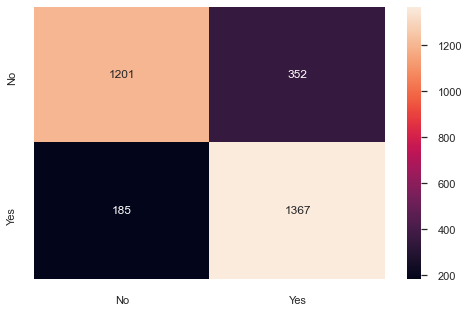

In [473]:
Y_predict_test = abcl_reg.predict(X_test)

print(abcl_reg.score(X_test , Y_test))

cm=metrics.confusion_matrix(Y_test, Y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Confusion Matrix for AdaBoost on TRAINING data

0.8351511804500897


<AxesSubplot:>

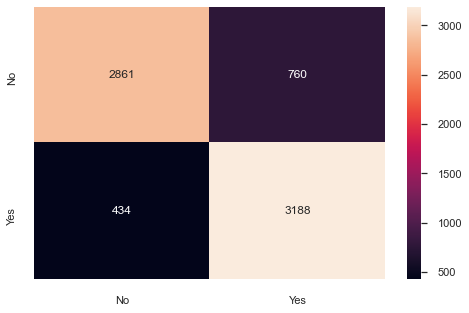

In [474]:
Y_predict_train = abcl_reg.predict(X_train)

print(abcl_reg.score(X_train , Y_train))

cm=metrics.confusion_matrix(Y_train, Y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Classification Report for AdaBoost on test data

In [475]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test,digits=3))

              precision    recall  f1-score   support

           0      0.867     0.773     0.817      1553
           1      0.795     0.881     0.836      1552

    accuracy                          0.827      3105
   macro avg      0.831     0.827     0.827      3105
weighted avg      0.831     0.827     0.827      3105



### Classification Report for AdaBoost on training data

In [476]:
print(classification_report(Y_train, Y_predict_train,digits=3))

              precision    recall  f1-score   support

           0      0.868     0.790     0.827      3621
           1      0.807     0.880     0.842      3622

    accuracy                          0.835      7243
   macro avg      0.838     0.835     0.835      7243
weighted avg      0.838     0.835     0.835      7243



### AUC- ROC Curve for AdaBoost on Train data.

AUC: 0.835


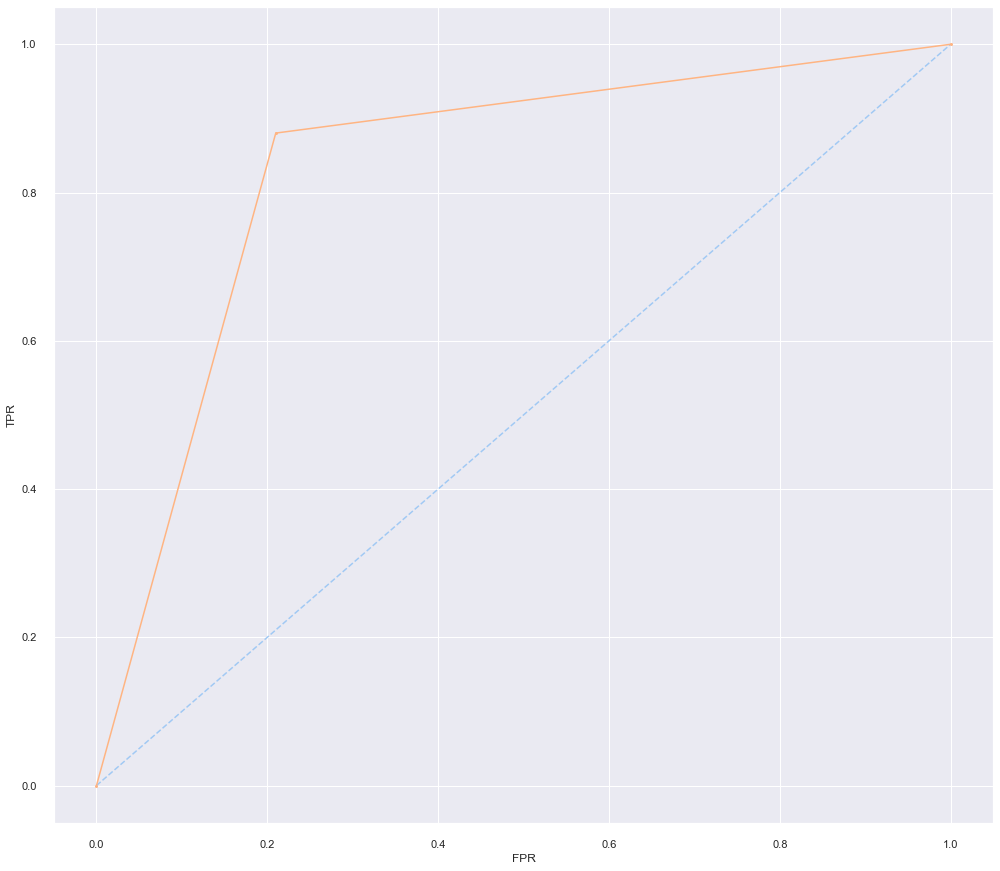

In [477]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_predict_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_predict_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for AdaBoost on Test data.

AUC: 0.827


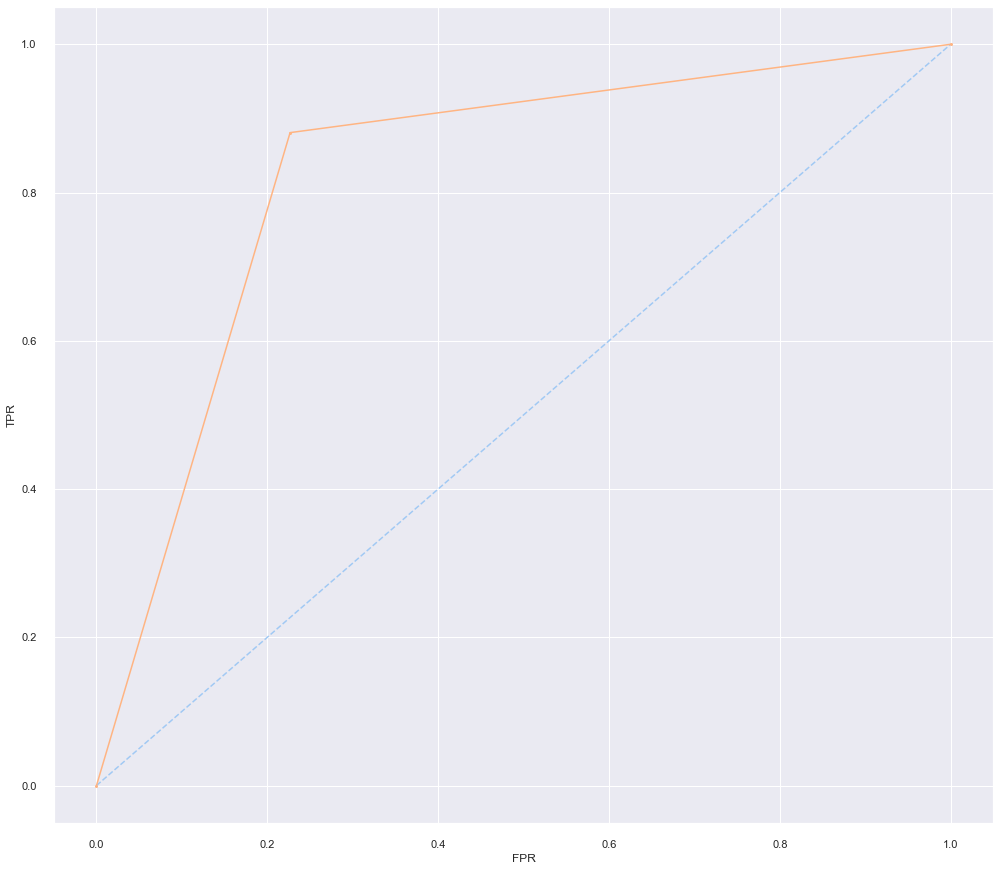

In [478]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_predict_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

In [479]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Sno':['4'], 'Method':['Ada Boost'], 'Initial Test Accuracy': abcl.score(X_test , Y_test), 'Initial Train Accuracy': abcl.score(X_train , Y_train), 'Regularised Test Accuracy': abcl_reg.score(X_test , Y_test), 'Regularised Train Accuracy': abcl_reg.score(X_train , Y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Sno', 'Method', 'Initial Test Accuracy', 'Initial Train Accuracy', 'Regularised Test Accuracy', 'Regularised Train Accuracy']]
resultsDf

Sno         Method  Initial Test Accuracy  Initial Train Accuracy  Regularised Test Accuracy  Regularised Train Accuracy
0   1  Decision Tree               0.786795                0.998343                   0.798712                    0.839845
0   2        Bagging               0.838325                0.997791                   0.760386                    0.766671
0   3  Random Forest               0.840258                0.997653                   0.832206                    0.892724
0   4      Ada Boost               0.799678                0.801049                   0.827053                    0.835151

### We generalised the model with Random CV. There was improvement of Accuracies with minimal difference between train and test data. This model generalised well.

===================================================================================================================================================================================

### Gradient Boosting Classifier Model

In [480]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

In [481]:
print(gbcl.score(X_train, Y_train))
print(gbcl.score(X_test, Y_test))

0.8278337705370703
0.8157809983896941


### Applying Randomized Search Cross Validation for Fine Tuning Gradient Boosting Classifier

In [498]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [10,20,30,40,50,60,70, 80,90,100,115,130],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [499]:
RS_GB = RandomizedSearchCV(estimator=gbcl, param_distributions = grid_param, cv=5, n_jobs =-1, verbose = 3)

In [500]:
GB = RS_GB.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [501]:
GB.best_params_

{'n_estimators': 115,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 8}

In [502]:
gbcl_reg = GradientBoostingClassifier(n_estimators=115,random_state=1,min_samples_split=8,min_samples_leaf=6,max_features='log2',max_depth=8)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

gbcl_reg = gbcl_reg.fit(X_train, Y_train)

In [503]:
print(gbcl_reg.score(X_train, Y_train))
print(gbcl_reg.score(X_test, Y_test))

0.9629987574209582
0.842512077294686


### Confusion Matrix for Gradient Boosting on TEST data

0.842512077294686


<AxesSubplot:>

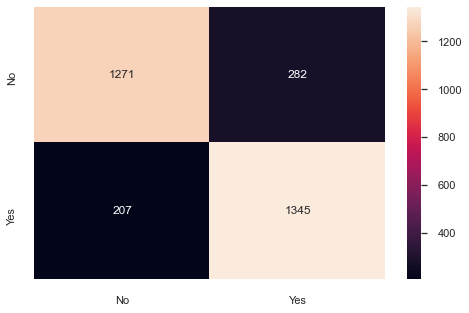

In [504]:
Y_predict_test = gbcl_reg.predict(X_test)

print(gbcl_reg.score(X_test , Y_test))

cm=metrics.confusion_matrix(Y_test, Y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Confusion Matrix for Gradient Boosting on TRAINING data

In [505]:
Y_predict_train = gbcl_reg.predict(X_train)

print(gbcl_reg.score(X_train , Y_train))

cm=metrics.confusion_matrix(Y_train, Y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.9629987574209582


<AxesSubplot:>

### Classification Report for Gradient Boosting on test data

In [506]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test,digits=3))

              precision    recall  f1-score   support

           0      0.860     0.818     0.839      1553
           1      0.827     0.867     0.846      1552

    accuracy                          0.843      3105
   macro avg      0.843     0.843     0.842      3105
weighted avg      0.843     0.843     0.842      3105



### Classification Report for Gradient Boosting on training data

In [507]:
print(classification_report(Y_train, Y_predict_train,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.945     0.962      3621
           1      0.947     0.981     0.964      3622

    accuracy                          0.963      7243
   macro avg      0.964     0.963     0.963      7243
weighted avg      0.964     0.963     0.963      7243



### AUC- ROC Curve for Gradient Boosting on Train data.

AUC: 0.963


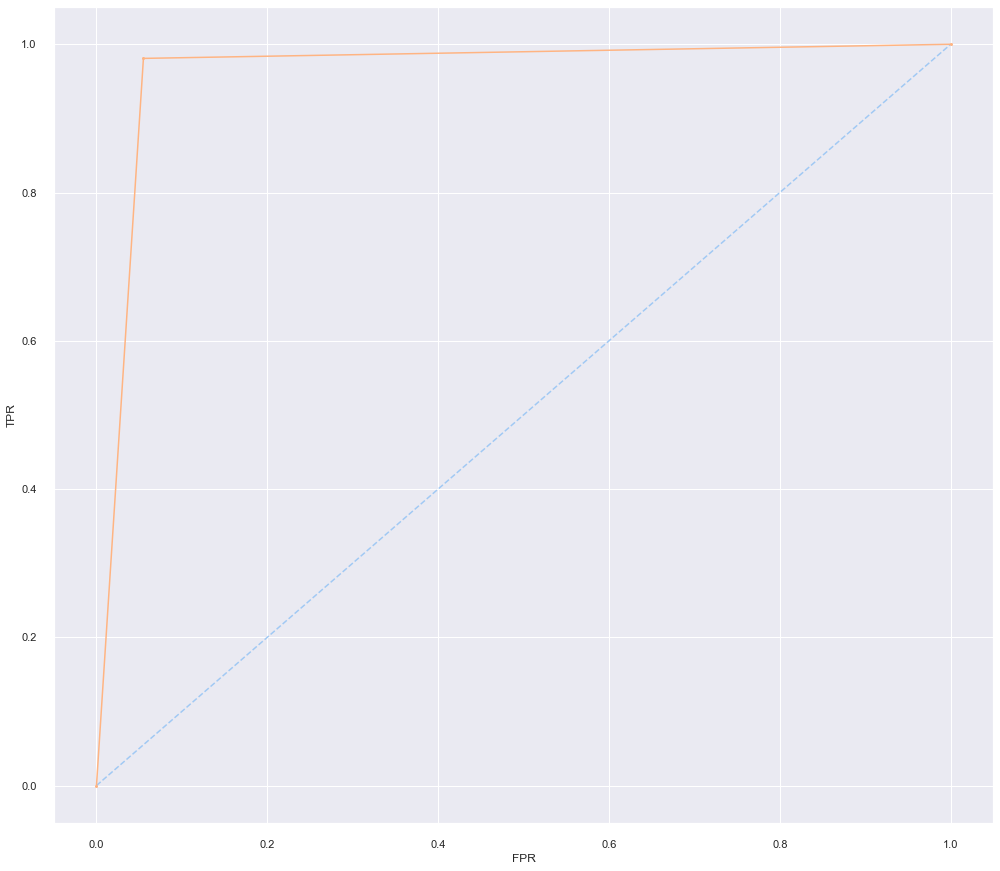

In [508]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_predict_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_predict_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for Gradient Boosting on Test data.

AUC: 0.843


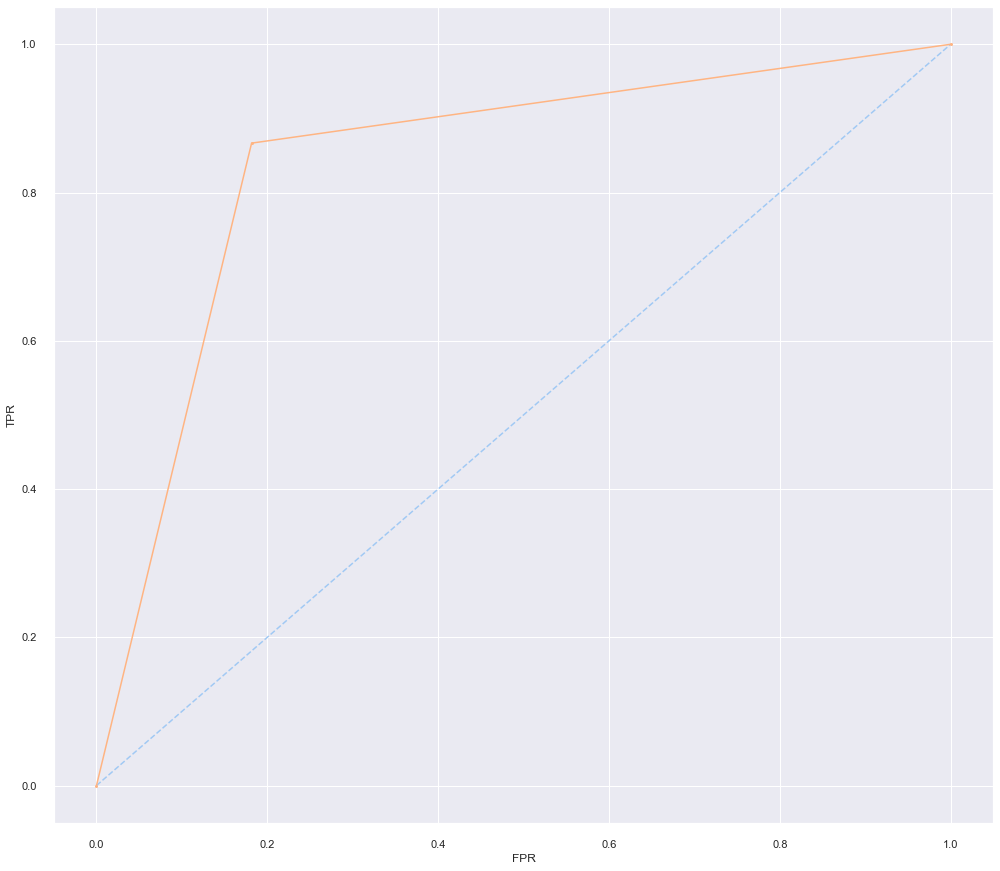

In [509]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_predict_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

In [510]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Sno':['5'], 'Method':['Gradient Boost'],'Initial Test Accuracy': gbcl.score(X_test , Y_test), 'Initial Train Accuracy': gbcl.score(X_train , Y_train), 'Regularised Test Accuracy': gbcl_reg.score(X_test , Y_test), 'Regularised Train Accuracy': gbcl_reg.score(X_train , Y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Sno', 'Method', 'Initial Test Accuracy', 'Initial Train Accuracy', 'Regularised Test Accuracy', 'Regularised Train Accuracy']]
resultsDf

Sno          Method  Initial Test Accuracy  Initial Train Accuracy  Regularised Test Accuracy  Regularised Train Accuracy
0   1   Decision Tree               0.786795                0.998343                   0.798712                    0.839845
0   2         Bagging               0.838325                0.997791                   0.760386                    0.766671
0   3   Random Forest               0.840258                0.997653                   0.832206                    0.892724
0   4       Ada Boost               0.799678                0.801049                   0.827053                    0.835151
0   5  Gradient Boost               0.815781                0.827834                   0.842512                    0.962999

### We generalised the model with Random CV. There was improvement of Accuracies, but it led to overfitting.

===================================================================================================================================================================================

### Extreme Gradient Boosting Classifier Model

In [511]:
!pip install xgboost
from xgboost import XGBClassifier
xbcl = XGBClassifier(objective='binary:logistic')
xbcl.fit(X_train, Y_train)

[09:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [512]:
print(xbcl.score(X_train, Y_train))
print(xbcl.score(X_test, Y_test))

0.9588568272815132
0.8405797101449275


### Applying Randomized Search Cross Validation for Fine Tuning Extreme Gradient Boosting Classifier

In [513]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'n_estimators' : range(100,1500,100),
    'max_depth' : range(3,16,1),
    'min_child_weight' : [1,2,3,4],
    'gamma': [0.1,0.2,0.3,0.4],
    'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7],
    'learning_rate' : [0.001,0.01,0.1,1]
}

In [514]:
RS_XB = RandomizedSearchCV(estimator=xbcl, param_distributions = grid_param, cv=5, n_jobs =-1, verbose = 3)

In [515]:
XB = RS_XB.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [516]:
XB.best_params_

{'n_estimators': 1300,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.01,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [517]:
xbcl_reg = XGBClassifier(n_estimators=1300,random_state=1,min_child_weight=1,max_depth=15,learning_rate=0.01,gamma=0.3,colsample_bytree=0.7)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

xbcl_reg = xbcl_reg.fit(X_train, Y_train)

[09:42:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [518]:
print(xbcl_reg.score(X_train, Y_train))
print(xbcl_reg.score(X_test, Y_test))

0.9932348474389066
0.8476650563607085


### Confusion Matrix for Extreme Gradient Boosting on TEST data

0.8476650563607085


<AxesSubplot:>

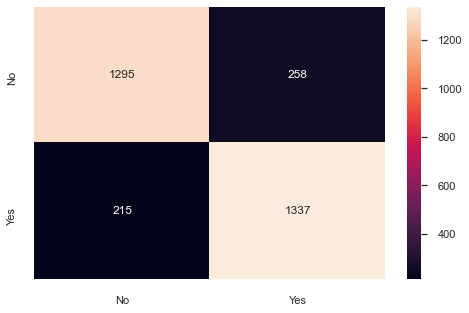

In [519]:
Y_predict_test = xbcl_reg.predict(X_test)

print(xbcl_reg.score(X_test , Y_test))

cm=metrics.confusion_matrix(Y_test, Y_predict_test,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Confusion Matrix for Extreme Gradient Boosting on TRAINING data

0.9932348474389066


<AxesSubplot:>

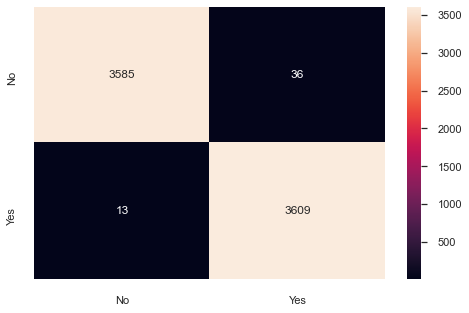

In [520]:
Y_predict_train = xbcl_reg.predict(X_train)

print(xbcl_reg.score(X_train , Y_train))

cm=metrics.confusion_matrix(Y_train, Y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Classification Report for Extreme Gradient Boosting on test data

In [521]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test,digits=3))

              precision    recall  f1-score   support

           0      0.858     0.834     0.846      1553
           1      0.838     0.861     0.850      1552

    accuracy                          0.848      3105
   macro avg      0.848     0.848     0.848      3105
weighted avg      0.848     0.848     0.848      3105



### Classification Report for Extreme Gradient Boosting on training data

In [522]:
print(classification_report(Y_train, Y_predict_train,digits=3))

              precision    recall  f1-score   support

           0      0.996     0.990     0.993      3621
           1      0.990     0.996     0.993      3622

    accuracy                          0.993      7243
   macro avg      0.993     0.993     0.993      7243
weighted avg      0.993     0.993     0.993      7243



### AUC- ROC Curve for Extreme Gradient Boosting on Train data.

AUC: 0.993


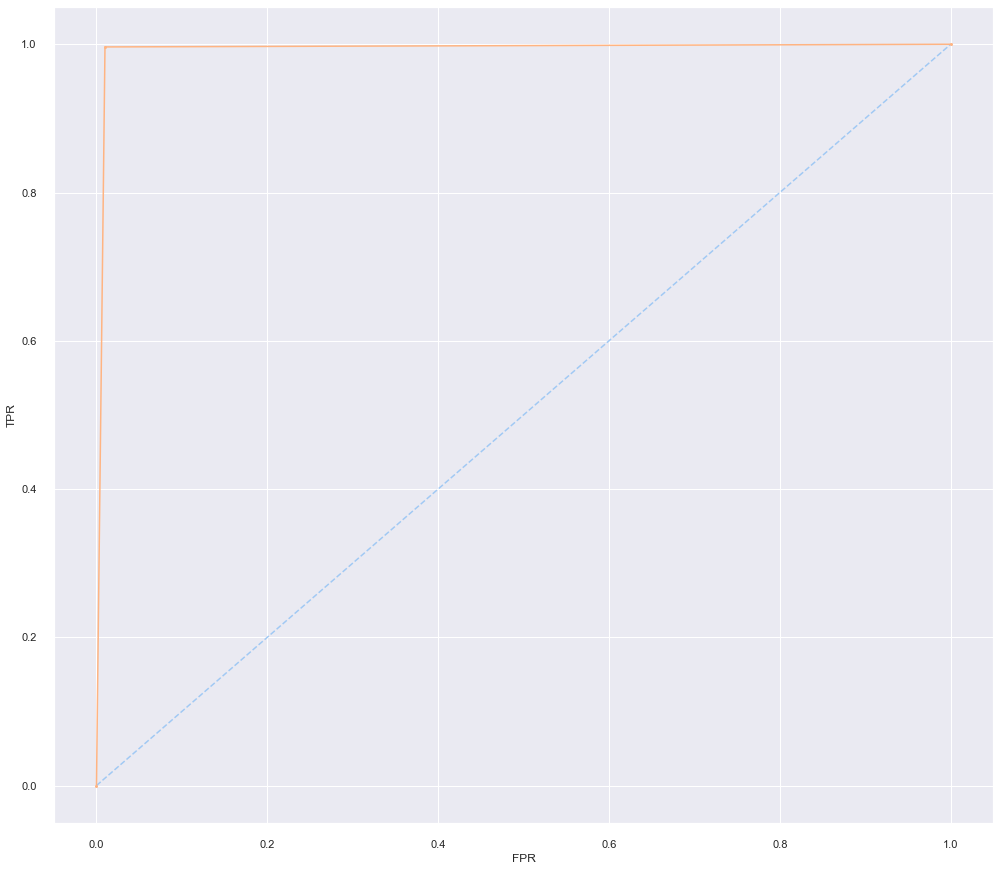

In [523]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_train, Y_predict_train)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_train, Y_predict_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

### AUC- ROC Curve for Extreme Gradient Boosting on Test data.

AUC: 0.848


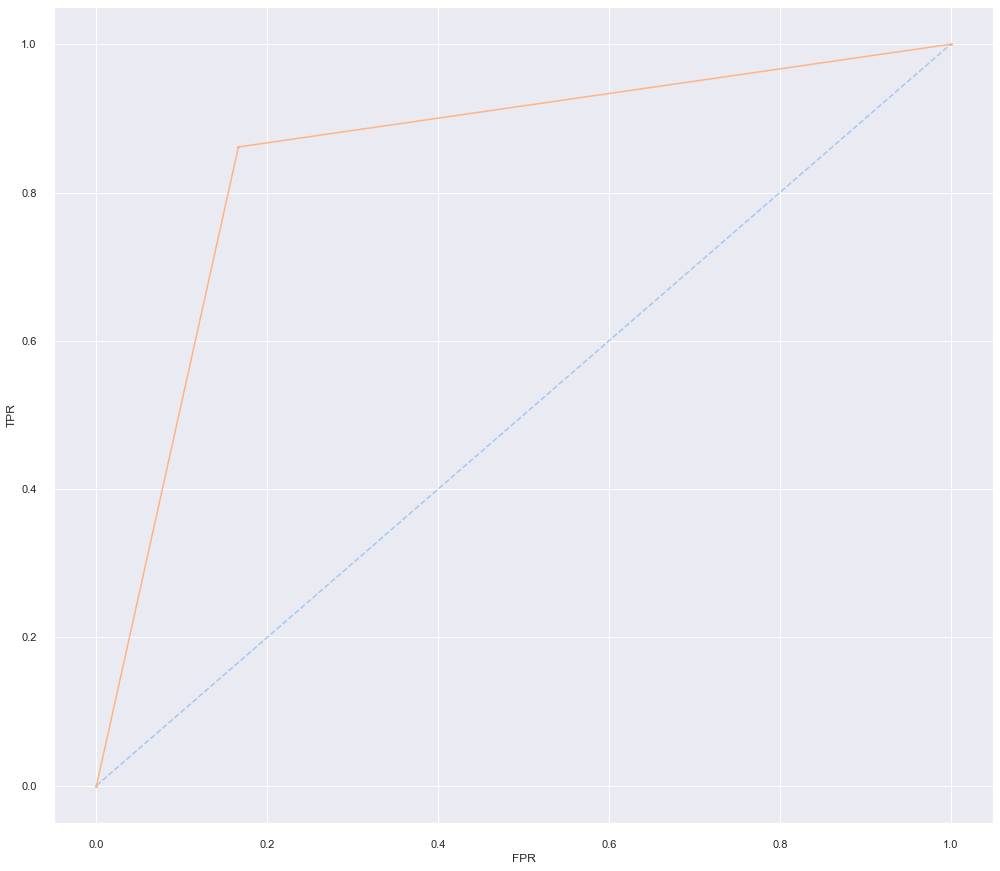

In [524]:

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_predict_test)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
plt.figure(figsize=(15,15))
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.')
plt.ylabel('TPR')
plt.xlabel('FPR')
# show the plot
plt.show()

In [525]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Sno':['6'], 'Method':['Extreme Gradient Boost'],'Initial Test Accuracy': xbcl.score(X_test , Y_test), 'Initial Train Accuracy': xbcl.score(X_train , Y_train), 'Regularised Test Accuracy': xbcl_reg.score(X_test , Y_test), 'Regularised Train Accuracy': xbcl_reg.score(X_train , Y_train)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Sno', 'Method', 'Initial Test Accuracy', 'Initial Train Accuracy', 'Regularised Test Accuracy', 'Regularised Train Accuracy']]
resultsDf

Sno                  Method  Initial Test Accuracy  Initial Train Accuracy  Regularised Test Accuracy  Regularised Train Accuracy
0   1           Decision Tree               0.786795                0.998343                   0.798712                    0.839845
0   2                 Bagging               0.838325                0.997791                   0.760386                    0.766671
0   3           Random Forest               0.840258                0.997653                   0.832206                    0.892724
0   4               Ada Boost               0.799678                0.801049                   0.827053                    0.835151
0   5          Gradient Boost               0.815781                0.827834                   0.842512                    0.962999
0   6  Extreme Gradient Boost               0.840580                0.958857                   0.847665                    0.993235

### High overfitting even after regularisation

===================================================================================================================================================================================

### Display and compare all the models designed with their train and test accuracies.

In [526]:
resultsDf

Sno                  Method  Initial Test Accuracy  Initial Train Accuracy  Regularised Test Accuracy  Regularised Train Accuracy
0   1           Decision Tree               0.786795                0.998343                   0.798712                    0.839845
0   2                 Bagging               0.838325                0.997791                   0.760386                    0.766671
0   3           Random Forest               0.840258                0.997653                   0.832206                    0.892724
0   4               Ada Boost               0.799678                0.801049                   0.827053                    0.835151
0   5          Gradient Boost               0.815781                0.827834                   0.842512                    0.962999
0   6  Extreme Gradient Boost               0.840580                0.958857                   0.847665                    0.993235

### Select the final best trained model along with your detailed comments for selecting this model.

## Random Forest becomes the best model as huge amount of overfitting have been decreased and also there is less difference between train and test accuracies after tuning!!

### Pickle the selected model for future use.

In [527]:
import pickle
pickle.dump(rfcl_reg, open("rfcl_reg.pkl", 'wb'))

## 6. Conclusion and improvisation:

### The final model selected for this problem statement is Random Forest with hyper parameters. The reason is that 

### * This Random Forest model gives better accuracy score as compared to the other models fitted and also huge amount of overfitting is reduced. 
### * The Ada Boost model also has generalized well (Minimum difference between train and test accuracies) but with low accuracy score.
### * The Bagging model also has generalized well (Minimum difference between train and test accuracies) but with low accuracy score although it reduced high overfitting.
### * The Decision Tree model also has generalized well (Minimum difference between train and test accuracies) but with low accuracy score although it reduced high overfitting.
### * The Gradient Boost Model increased accuracy score but it led to overfitting. 
### * The Extreme Gradient Boost model increased overfitting furthur.

### Suggestions and Improvements

#### * 682 customers didnt have phone service and that effected the customers who had multiple lines. So this can be improved.  
#### * 1526 customers didnt have internet service and that effected customers who had signed up for online security, online backup, device protection, tech support, and streaming TV and movies. So this can also be improved.
#### * Manual Payment method 3977 is more than automatic payment method 3066. With customers signing up for internet services that can also be reduced and more automatic payment methods can be introduced to decrease the churn.
#### * Churn can be introduced for senior citizens as it can be time for their retirement. Number of senior citizens customers can be increased.